In [3]:
import os  # Provides functions for interacting with the operating system
import requests  # Used for making HTTP requests, such as downloading files
import gzip  # Handles the extraction of .gz files
import shutil  # Provides high-level file operations like copying files
import numpy as np  # For numerical operations like handling arrays
import matplotlib.pyplot as plt  # For plotting and visualizing data
import random  # For generating random numbers
import cv2  # OpenCV library for image processing
import glob  # Used for file pattern matching

# Transformer models and tokenizers for vision tasks
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer, CLIPSegProcessor, CLIPSegForImageSegmentation

# PyTorch library for deep learning
import torch
from torchvision import transforms  # For data transformation in PyTorch

# PIL library for image processing
from PIL import Image, ImageDraw




### correct the class indices starting from zero instead of one

In [3]:
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
annotation_path = "./colorful_fashion_dataset/Annotations"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"
label_file_path = "./colorful_fashion_dataset/labels.txt"
print(os.path.exists(image_sets_path))
print(os.path.exists(image_path))
print(os.path.exists(annotation_path))
print(os.path.exists(label_file_path))
print(os.path.exists(new_annotation_path))




True
True
True
True
True


In [28]:
# Corrected paths based on your directory structure

image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"

# Check if the paths exist
print(os.path.exists(image_path))       # Should return True if the path is correct
print(os.path.exists(image_sets_path))  # Should return True if the path is correct

True
True


In [29]:
# Paths to the train/validation and test set files

trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')
print(f'trainval_file:{trainval_file}')
print(f'test_file:{test_file}')

# read the train set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]


if not os.path.exists(trainval_file):
    print('file not exists')


num_trainval = len(trainval_images)
num_test = len(test_images)

print(f'number of images in train/validation set:{num_trainval}')
print(f'number of images in test set :{num_test}')
print(f'type of trainval_images is :{type(trainval_images)}')
print(f'type of test set is {type(test_images)}')

all_images_path = glob.glob(os.path.join(image_path, '*.jpg'))
print(all_images_path)



trainval_file:./colorful_fashion_dataset/ImageSets/Main/trainval.txt
test_file:./colorful_fashion_dataset/ImageSets/Main/test.txt
number of images in train/validation set:2145
number of images in test set :537
type of trainval_images is :<class 'list'>
type of test set is <class 'list'>
['./colorful_fashion_dataset/JPEGImages/43737.jpg', './colorful_fashion_dataset/JPEGImages/108643.jpg', './colorful_fashion_dataset/JPEGImages/100824.jpg', './colorful_fashion_dataset/JPEGImages/172089.jpg', './colorful_fashion_dataset/JPEGImages/21479.jpg', './colorful_fashion_dataset/JPEGImages/180169.jpg', './colorful_fashion_dataset/JPEGImages/142573.jpg', './colorful_fashion_dataset/JPEGImages/7660.jpg', './colorful_fashion_dataset/JPEGImages/2061.jpg', './colorful_fashion_dataset/JPEGImages/36263.jpg', './colorful_fashion_dataset/JPEGImages/161153.jpg', './colorful_fashion_dataset/JPEGImages/184868.jpg', './colorful_fashion_dataset/JPEGImages/153638.jpg', './colorful_fashion_dataset/JPEGImages/147

### visualize some images from colorful dataset

168468.jpg
20751.jpg
184291.jpg
63239.jpg
110606.jpg


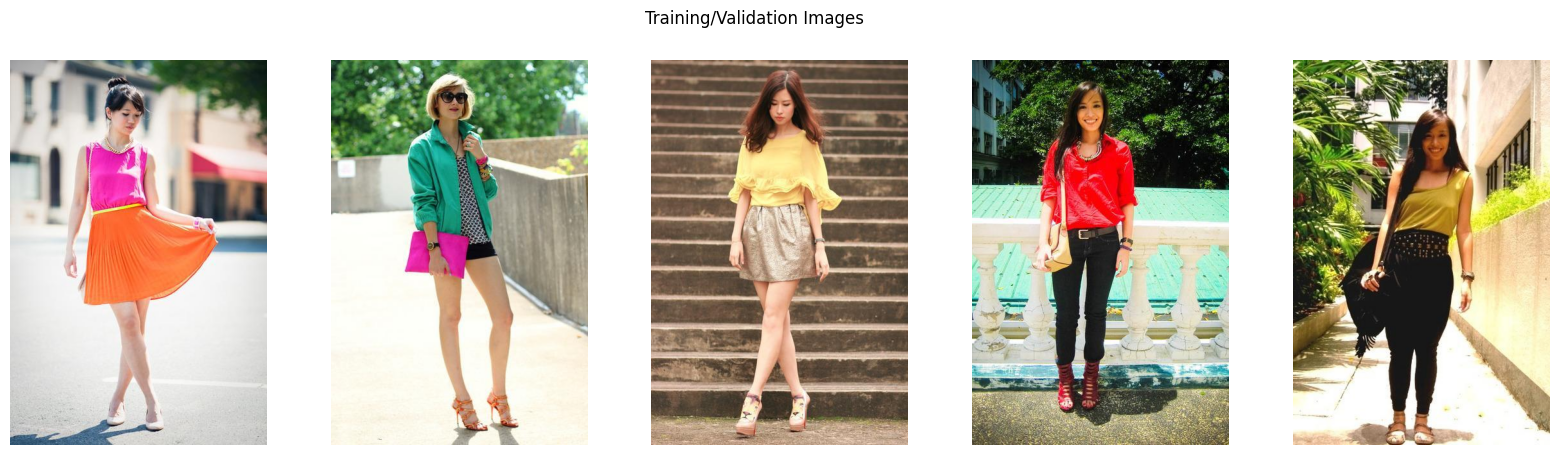

185218.jpg
45639.jpg
449.jpg
33441.jpg
87956.jpg


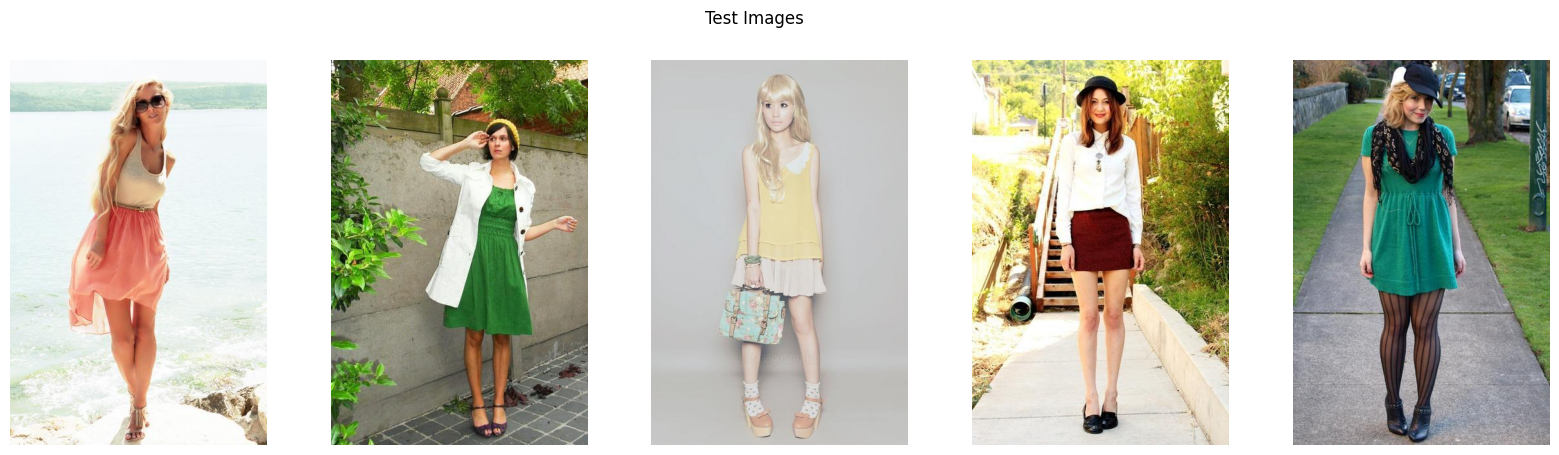

In [30]:
def display_samples(image_list, title, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))
    for i in range(num_samples):
        img_name = image_list[i] + '.jpg'
        print(img_name)
        img_path = os.path.join(image_path, img_name)
        image = Image.open(img_path)
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

# Display a few training/validation images
display_samples(trainval_images, 'Training/Validation Images', num_samples=5)

# Display a few test images
display_samples(test_images, 'Test Images', num_samples=5)

### visualize images with path from glob.glob

['168468', '20751', '184291', '63239', '110606', '31187', '103194', '137927', '89286', '46319', '62403', '53324', '30169', '185536', '98155', '175092', '121359', '50761', '184951', '81298', '133345', '47897', '13689', '120376', '185145', '88148', '138332', '124731', '64263', '102551', '123954', '83626', '100034', '13302', '159249', '110686', '62639', '53060', '26107', '115148', '186905', '17856', '104798', '14058', '177993', '30429', '185196', '23001', '110739', '191287', '103419', '165166', '144894', '87026', '185830', '73507', '87406', '177810', '55928', '84072', '11674', '27992', '47978', '105494', '81865', '12175', '164716', '88622', '151175', '2061', '39123', '41142', '13722', '90104', '185714', '92267', '1388', '88380', '181527', '187362', '35921', '80692', '444', '52202', '176907', '171839', '62605', '130366', '47502', '173552', '82309', '136647', '42251', '2499', '15707', '112639', '190520', '59289', '31982', '50992', '48902', '80841', '81937', '27483', '2545', '162735', '11645

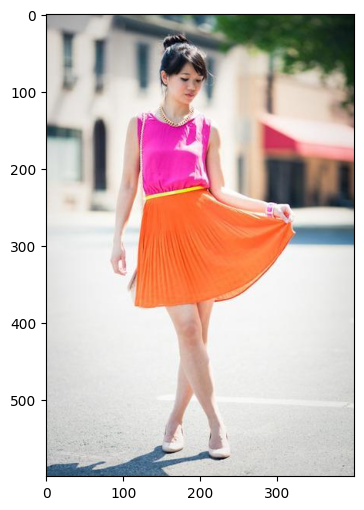

In [31]:
# visualize images with path from glob.glob
# img_path = all_images_path[10]
# image = plt.imread(img_path)
# print(image.shape)
# plt.imshow(image)
# plt.show()

image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"

trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# print(trainval_file)
# print(test_file)

with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]
# print(len(trainval_images))
print(trainval_images)


with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]
# print(len(test_images))

trainval_images_path = [os.path.join(image_path, f'{img_id}.jpg') for img_id in trainval_images]
test_images_path = [os.path.join(image_path, f'{img_id}.jpg') for img_id in test_images]


# print(trainval_images_path)

img_path = trainval_images_path[0]
plt.figure(figsize = (12, 6))
image = plt.imread(img_path)
plt.imshow(image)
plt.show()


# or we can use Image from PIL and select randomly an image_path
# img_path = random.choice(trainval_images_path)
# image = Image.open(img_path).convert('RGB')
# plt.imshow(image)
# plt.show()

### Extract ground truth bounding boxes from XML files and save them in another annotations file (new_Annotation_path)

In [32]:
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
annotation_path = "./colorful_fashion_dataset/Annotations"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"
label_file_path = "./colorful_fashion_dataset/labels.txt"
print(os.path.exists(image_sets_path))
print(os.path.exists(image_path))
print(os.path.exists(annotation_path))
print(os.path.exists(label_file_path))
print(os.path.exists(new_annotation_path))

# Corrected paths based on your directory structure

image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"

# Check if the paths exist
print(os.path.exists(image_path))       # Should return True if the path is correct
print(os.path.exists(image_sets_path))  # Should return True if the path is correct

# Paths to the train/validation and test set files

trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')
print(f'trainval_file:{trainval_file}')
print(f'test_file:{test_file}')

# read the train set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]


if not os.path.exists(trainval_file):
    print('file not exists')


num_trainval = len(trainval_images)
num_test = len(test_images)

print(f'number of images in train/validation set:{num_trainval}')
print(f'number of images in test set :{num_test}')
print(f'type of trainval_images is :{type(trainval_images)}')
print(f'type of test set is {type(test_images)}')


trainval_image_paths = [os.path.join(image_path, f'{img_id}.jpg') for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f'{img_id}.jpg') for img_id in test_images]


# Function to extract bounding boxes from XML file
def extract_bboxes_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        class_id = prompts.index(class_name) if class_name in prompts else -1
        if class_id >= 0:
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            bboxes.append((class_id, xmin, ymin, xmax, ymax))
    return bboxes

# Loop through all images and process them
for img_path in trainval_image_paths:
    print(f"Processing {img_path}")

    # Extract ground truth bounding boxes from XML
    xml_file = os.path.join(annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.xml")
    if not os.path.exists(xml_file):
        print(f"{xml_file} does not exist.")
        continue
    
    bboxes = extract_bboxes_from_xml(xml_file)

    # Save the bounding boxes to a new annotations file
    new_annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
    with open(new_annotation_file, 'w') as f:
        for bbox in bboxes:
            f.write(' '.join(map(str, bbox)) + '\n')

    print(f"Saved annotations to {new_annotation_file}")

print("Processing complete.") 


# Loop through all test images and process them
for img_path in test_image_paths:
    print(f"Processing {img_path}")

    # Extract ground truth bounding boxes from XML
    xml_file = os.path.join(annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.xml")
    if not os.path.exists(xml_file):
        print(f"{xml_file} does not exist.")
        continue
    
    bboxes = extract_bboxes_from_xml(xml_file)

    # Save the bounding boxes to a new annotations file
    new_annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
    with open(new_annotation_file, 'w') as f:
        for bbox in bboxes:
            f.write(' '.join(map(str, bbox)) + '\n')

    print(f"Saved annotations to {new_annotation_file}")

print("Processing of test images complete.")


prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]








True
True
True
True
True
True
True
trainval_file:./colorful_fashion_dataset/ImageSets/Main/trainval.txt
test_file:./colorful_fashion_dataset/ImageSets/Main/test.txt
number of images in train/validation set:2145
number of images in test set :537
type of trainval_images is :<class 'list'>
type of test set is <class 'list'>
Processing ./colorful_fashion_dataset/JPEGImages/168468.jpg
Saved annotations to ./colorful_fashion_dataset/Annotations_txt/168468.txt
Processing ./colorful_fashion_dataset/JPEGImages/20751.jpg
Saved annotations to ./colorful_fashion_dataset/Annotations_txt/20751.txt
Processing ./colorful_fashion_dataset/JPEGImages/184291.jpg
Saved annotations to ./colorful_fashion_dataset/Annotations_txt/184291.txt
Processing ./colorful_fashion_dataset/JPEGImages/63239.jpg
Saved annotations to ./colorful_fashion_dataset/Annotations_txt/63239.txt
Processing ./colorful_fashion_dataset/JPEGImages/110606.jpg
Saved annotations to ./colorful_fashion_dataset/Annotations_txt/110606.txt
Proces

trainval_file: ./colorful_fashion_dataset/ImageSets/Main/trainval.txt
test_file: ./colorful_fashion_dataset/ImageSets/Main/test.txt
Number of images in train/validation set: 2145
Number of images in test set: 537
Type of trainval_images: <class 'list'>
Type of test_images: <class 'list'>
Total images found: 2682


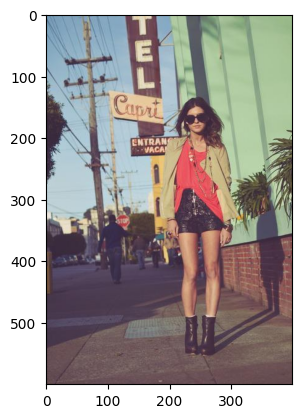

Unused or unrecognized kwargs: truncation, padding.


./colorful_fashion_dataset/JPEGImages/11674.jpg


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for pants vs skirt: [0.1896213 0.8103787]


Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for shorts vs dress: [0.9595602  0.04043981]
Softmax probabilities for shorts vs skirt: [0.8771144  0.12288561]


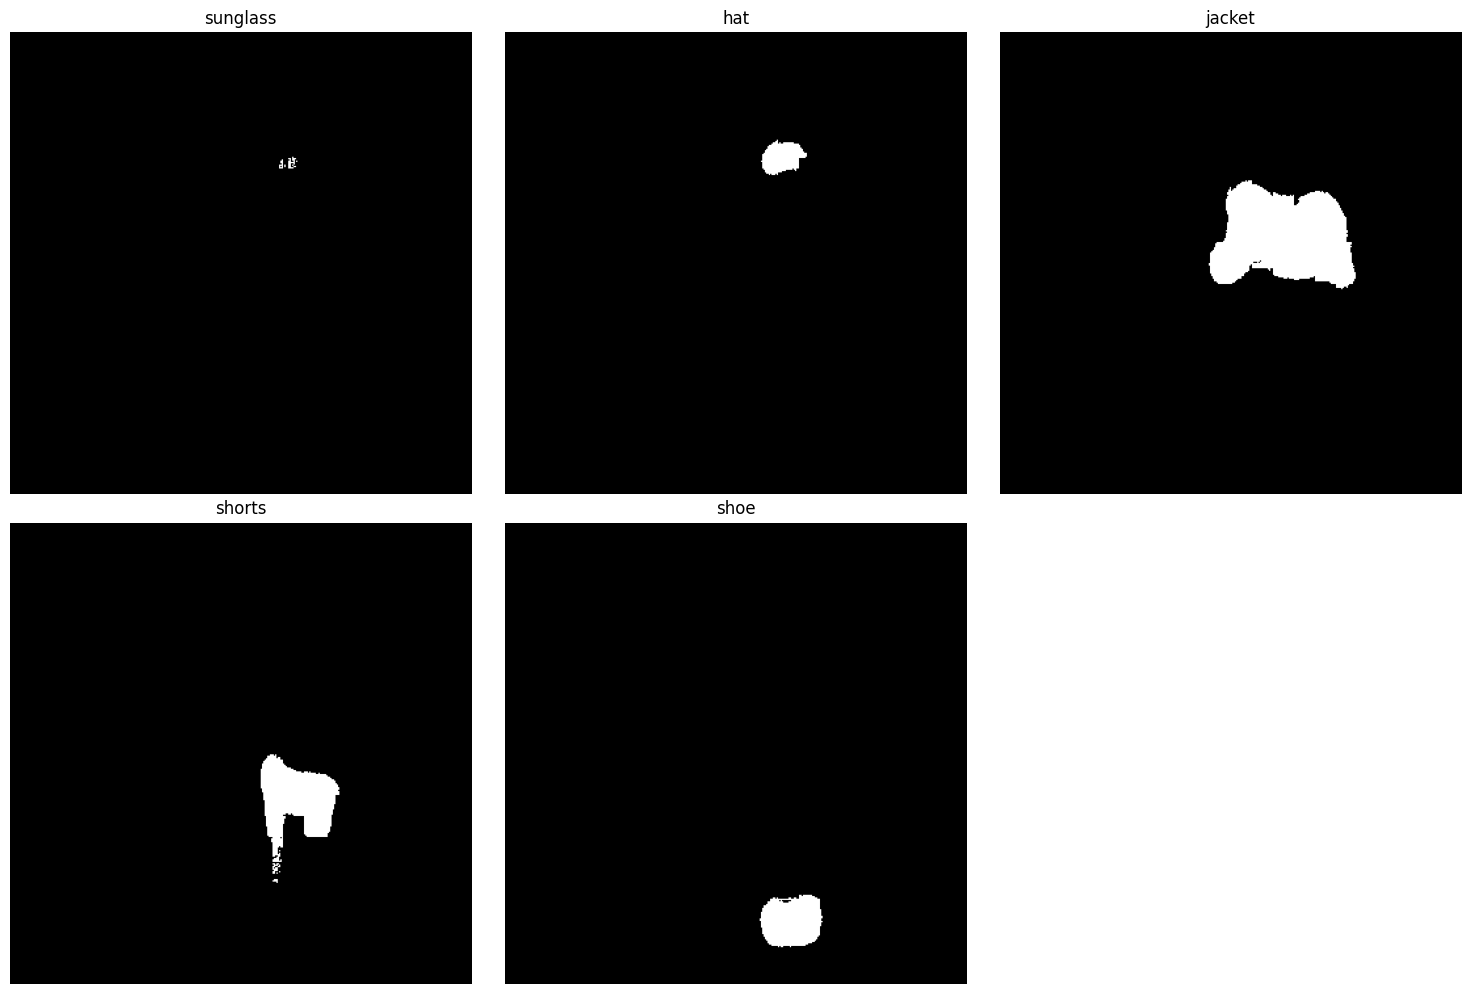

In [33]:
import os
import glob
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import matplotlib.pyplot as plt
import random
import torch


# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

print(f'trainval_file: {trainval_file}')
print(f'test_file: {test_file}')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

num_trainval = len(trainval_images)
num_test = len(test_images)

print(f'Number of images in train/validation set: {num_trainval}')
print(f'Number of images in test set: {num_test}')
print(f'Type of trainval_images: {type(trainval_images)}')
print(f'Type of test_images: {type(test_images)}')

# Get all image paths
all_images_path = glob.glob(os.path.join(image_path, '*.jpg'))
print(f'Total images found: {len(all_images_path)}')

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
# Define conflict dictionary
conflict_dict = {


    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": [ "skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts":["pants", "dress", "skirt"],
    "skirt":["pants, shorts", "dress"],
    "bag":[],
    "shoe":[],

}


# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        seg_inputs = processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        
        segmentation_results[prompt] = segmentation

    return segmentation_results

# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image, return_tensors="pt", padding=True, truncation=True)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break
    return items

# Segment clothing items with CLIPSeg and visualize results
def segment_and_visualize(image, prompts, model, processor):
    segmentation_results = generate_segmentation_masks(image, prompts, model, processor)

    # Resolve conflicts
    resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image)

    # Store the segmentation results for the resolved items
    resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}

    num_prompts = len(resolved_segmentation_results)
    num_columns = 3
    num_rows = (num_prompts + num_columns - 1) // num_columns  # Ensure the correct number of rows
    plt.figure(figsize=(15, 5 * num_rows))

    # # Ensure image is a PIL Image and get its size
    # if isinstance(image, np.ndarray):
    #     image = Image.fromarray(image)
    # assert isinstance(image, Image.Image), "image must be a PIL.Image object"
    # print(f"Image size: {image.size}")

    for idx, (prompt, segmentation_image) in enumerate(resolved_segmentation_results.items()):
        plt.subplot(num_rows, num_columns, idx + 1)
        plt.imshow(segmentation_image, cmap='gray')
        plt.title(f'{prompt}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return resolved_segmentation_results

# Select a random image from the train/validation set
img_path = trainval_image_paths[60]
image = Image.open(img_path).convert('RGB')
plt.imshow(image)
plt.show()
print(img_path)

# Segment and visualize the results
segmentation_results = segment_and_visualize(image, prompts, model, processor)


### test step by step of the model (segmentation of clothing items  directly after giving to clip seg-before resolve conflict)

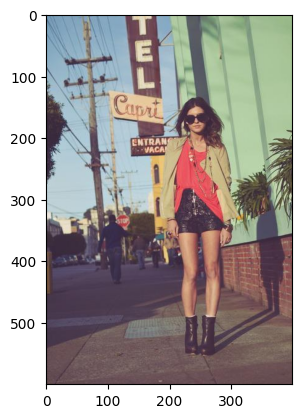

Unused or unrecognized kwargs: truncation, padding.


./colorful_fashion_dataset/JPEGImages/11674.jpg


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.
{'sunglass': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'hat': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'jacket': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'pants': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'shorts': array([[0, 0, 0, ..., 0, 0, 0]

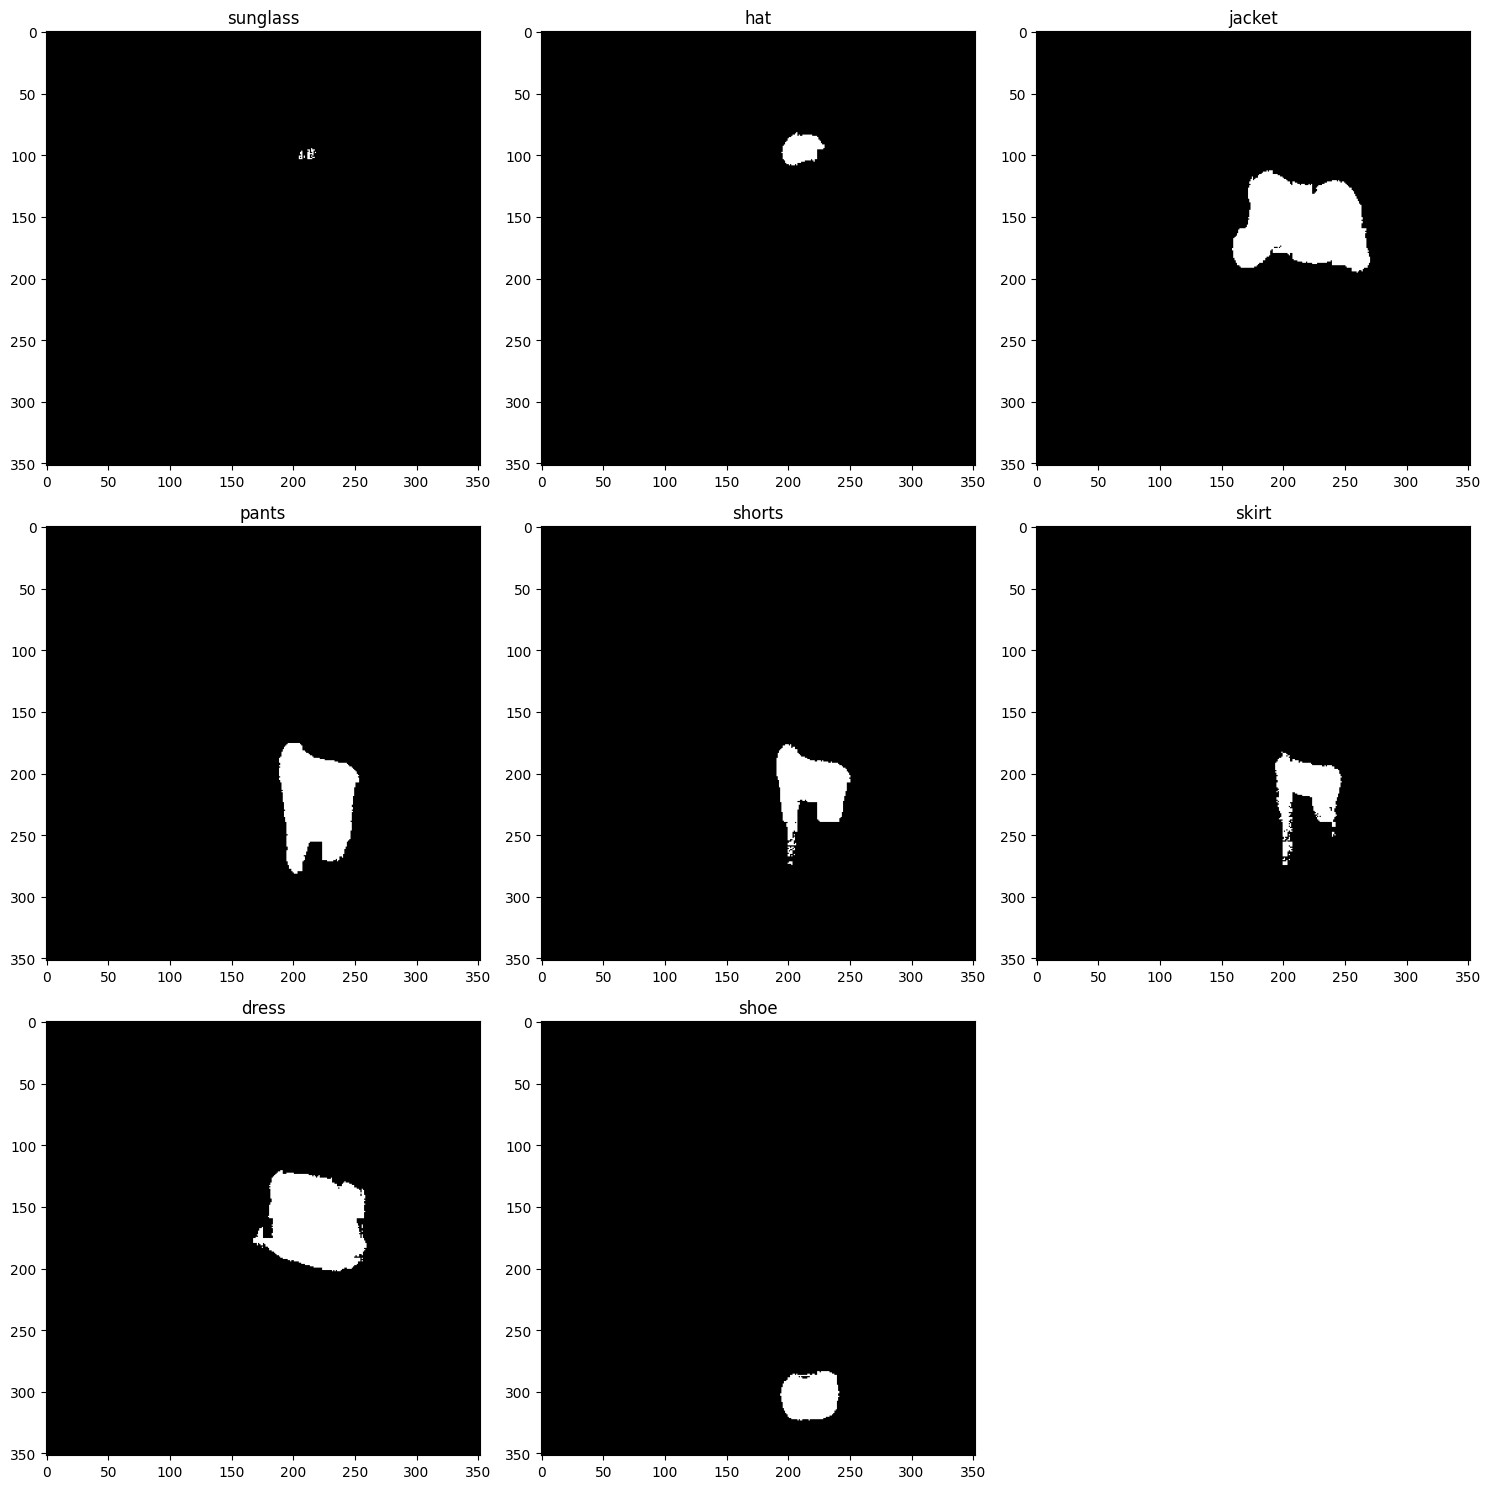

In [34]:



import os
import glob
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import matplotlib.pyplot as plt
import random
import torch


# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# print(f'trainval_file: {trainval_file}')
# print(f'test_file: {test_file}')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

num_trainval = len(trainval_images)
num_test = len(test_images)

# print(f'Number of images in train/validation set: {num_trainval}')
# print(f'Number of images in test set: {num_test}')
# print(f'Type of trainval_images: {type(trainval_images)}')
# print(f'Type of test_images: {type(test_images)}')

# Get all image paths
# all_images_path = glob.glob(os.path.join(image_path, '*.jpg'))
# print(f'Total images found: {len(all_images_path)}')

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
# Define conflict dictionary
conflict_dict = {


    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": [ "skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts":["pants", "dress", "skirt"],
    "skirt":["pants, shorts", "dress"],
    "bag":[],
    "shoe":[],

}


# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        seg_inputs = processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        
        segmentation_results[prompt] = segmentation

    return segmentation_results


# Segment clothing items with CLIPSeg and visualize results
def segment_and_visualize(image, prompts, model, processor):

    segmentation_results = generate_segmentation_masks(image, prompts, model, processor)
    print(segmentation_results)
    num_prompts = len(segmentation_results)
    num_columns = 3
    num_rows = (num_prompts + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 5 * num_rows))


    for idx, (prompt, segmentation) in enumerate(segmentation_results.items()):
        plt.subplot(num_rows, num_columns, idx + 1)
        plt.imshow(segmentation, cmap = 'gray')
        plt.title(f'{prompt}')
    plt.tight_layout()
    plt.show()



# Select a random image from the train/validation set
img_path = trainval_image_paths[60]
image = Image.open(img_path).convert('RGB')
plt.imshow(image)
plt.show()
print(img_path)

segment_and_visualize(image, prompts, model, processor)



### add resolve conflict function to previous code to get better segmentation result

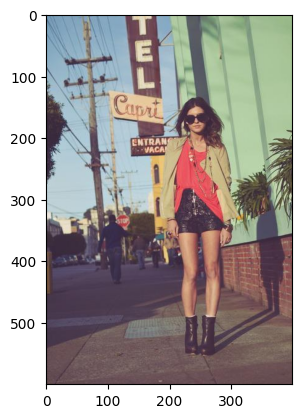

Unused or unrecognized kwargs: truncation, padding.


./colorful_fashion_dataset/JPEGImages/11674.jpg


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


the key of segmentation results,dict_keys(['sunglass', 'hat', 'jacket', 'pants', 'shorts', 'skirt', 'dress', 'shoe'])


Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for pants vs skirt: [0.1896213 0.8103787]


Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for shorts vs dress: [0.9595602  0.04043981]
Softmax probabilities for shorts vs skirt: [0.8771144  0.12288561]
resolved items :['sunglass', 'hat', 'jacket', 'shorts', 'shoe']


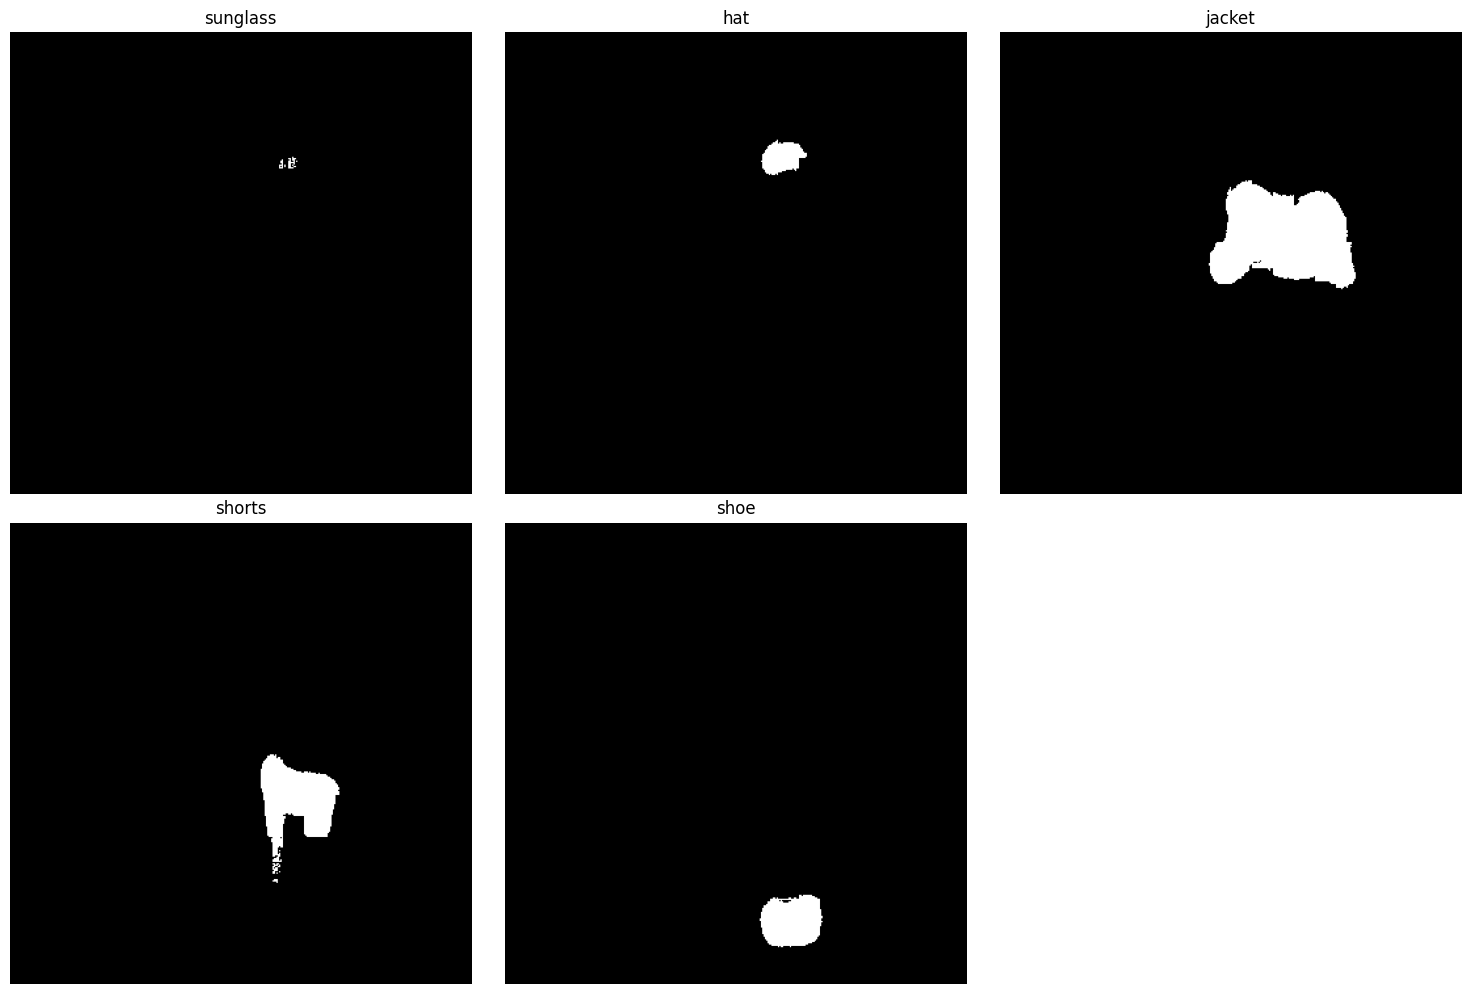

In [35]:
import os
import glob
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import matplotlib.pyplot as plt
import random
import torch


# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# print(f'trainval_file: {trainval_file}')
# print(f'test_file: {test_file}')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

num_trainval = len(trainval_images)
num_test = len(test_images)

# print(f'Number of images in train/validation set: {num_trainval}')
# print(f'Number of images in test set: {num_test}')
# print(f'Type of trainval_images: {type(trainval_images)}')
# print(f'Type of test_images: {type(test_images)}')

# Get all image paths
# all_images_path = glob.glob(os.path.join(image_path, '*.jpg'))
# print(f'Total images found: {len(all_images_path)}')

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
# Define conflict dictionary
conflict_dict = {


    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": [ "skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts":["pants", "dress", "skirt"],
    "skirt":["pants, shorts", "dress"],
    "bag":[],
    "shoe":[],

}


# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        seg_inputs = processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        
        segmentation_results[prompt] = segmentation

    return segmentation_results




# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image, return_tensors="pt", padding=True, truncation=True)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break
    return items





# Select a random image from the train/validation set
img_path = trainval_image_paths[60]
image = Image.open(img_path).convert('RGB')
plt.imshow(image)
plt.show()
print(img_path)


# Segment and visualize the results
segmentation_results = generate_segmentation_masks(image, prompts, model, processor)
print(f'the key of segmentation results,{segmentation_results.keys()}')
resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image)
print(f'resolved items :{resolved_items}')



resolved_segmentation_results = {item:segmentation_results[item] for item in resolved_items}

num_prompts = len(resolved_segmentation_results)
num_columns = 3
num_rows = (num_prompts + num_columns - 1) // num_columns          # Ensure the correct number of rows
plt.figure(figsize=(15, 5 * num_rows))



for idx, (prompt, segmentation_image) in enumerate(resolved_segmentation_results.items()):
    plt.subplot(num_rows, num_columns, idx + 1)
    plt.imshow(segmentation_image, cmap = 'gray')
    plt.title(f'{prompt}')
    plt.axis('off')
plt.tight_layout()
plt.show()




- the format of bounding box xmin,ymin,xmax,ymax
- center_x = (xmin + x_max) / 2
- center_y = (ymin + y_max) / 2

- width = x_max - x_min
- height = y_max - y_min

- area_bounding box = width * height




- for this what we want to achieve is these steps:
- generate segmentation mask using clip seg for each prompt- resolve conflict between overlapping segmentation results
-calculate bounding  box from masks
- resize all the masks with the size of images
- extract ground truth bounding boxes 

-draw bbox for one class id and on one image to see the overlap area


trainval_file: ./colorful_fashion_dataset/ImageSets/Main/trainval.txt
test_file: ./colorful_fashion_dataset/ImageSets/Main/test.txt
Number of images in train/validation set: 2145
Number of images in test set: 537
Type of trainval_images: <class 'list'>
Type of test_images: <class 'list'>


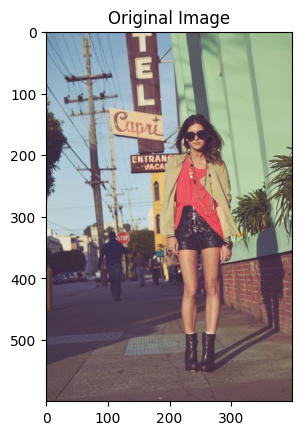

Unused or unrecognized kwargs: truncation, padding.


./colorful_fashion_dataset/JPEGImages/11674.jpg
Ground Truth Bounding Boxes: {3: (206, 204, 286, 335), 2: (180, 198, 310, 329), 9: (223, 488, 275, 552), 5: (204, 282, 290, 371)}


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for pants vs skirt: [0.1896213 0.8103787]


Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for shorts vs dress: [0.9595602  0.04043981]
Softmax probabilities for shorts vs skirt: [0.8771144  0.12288561]
Image size: (400, 600)


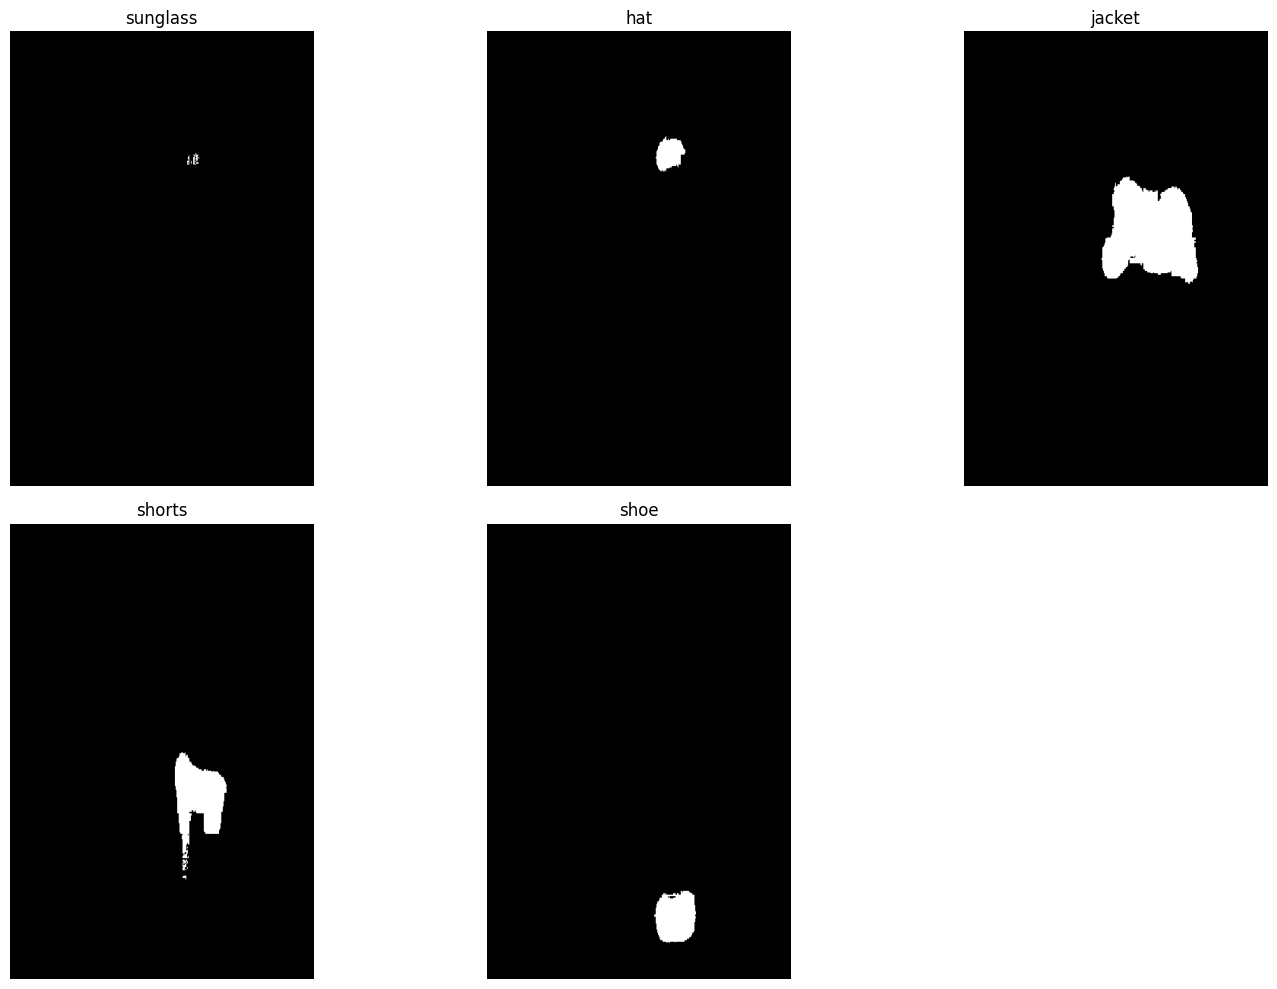

Bounding Boxes: {0: (233, 162, 248, 176), 1: (222, 140, 260, 185), 2: (181, 193, 307, 333), 5: (217, 302, 284, 468), 9: (220, 484, 274, 551)}
Predicted Box: (220, 484, 274, 551)
Ground Truth Box: (223, 488, 275, 552)


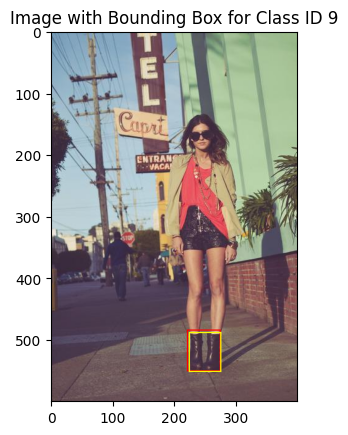

In [37]:
import os
import numpy as np
from PIL import Image, ImageDraw
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import matplotlib.pyplot as plt
import torch

# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

print(f'trainval_file: {trainval_file}')
print(f'test_file: {test_file}')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

num_trainval = len(trainval_images)
num_test = len(test_images)

print(f'Number of images in train/validation set: {num_trainval}')
print(f'Number of images in test set: {num_test}')
print(f'Type of trainval_images: {type(trainval_images)}')
print(f'Type of test_images: {type(test_images)}')

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
conflict_dict = {
    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": ["skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts": ["pants", "dress", "skirt"],
    "skirt": ["pants, shorts", "dress"],
    "bag": [],
    "shoe": [],
}

# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        seg_inputs = processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        # Ensure the mask has the same size as the original image
        segmentation = Image.fromarray(segmentation).resize(image.size, Image.NEAREST)
        segmentation = np.array(segmentation)

        segmentation_results[prompt] = segmentation

    return segmentation_results
# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image, return_tensors="pt", padding=True, truncation=True)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break
    return items

def get_bounding_boxes_from_masks(segmentation_results):
    bounding_boxes = {}
    class_ids = {
        "sunglass": 0,
        "hat": 1,
        "jacket": 2,
        "shirt": 3,
        "pants": 4,
        "shorts": 5,
        "skirt": 6,
        "dress": 7,
        "bag": 8,
        "shoe": 9
    }
    for item, mask in segmentation_results.items():
        y_indices, x_indices = np.where(mask > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue
        xmin = x_indices.min()
        xmax = x_indices.max()
        ymin = y_indices.min()
        ymax = y_indices.max()
        bounding_boxes[class_ids[item]] = (xmin, ymin, xmax, ymax)
    return bounding_boxes

# Function to draw bounding boxes on the image
def draw_bounding_boxes(image, bounding_boxes, ground_truth_bboxes, target_class_id):
    draw = ImageDraw.Draw(image)
    if target_class_id in bounding_boxes and target_class_id in ground_truth_bboxes:
        pred_box = bounding_boxes[target_class_id]
        gt_box = ground_truth_bboxes[target_class_id]
        print(f"Predicted Box: {pred_box}")  # Debug print
        print(f"Ground Truth Box: {gt_box}")  # Debug print
        if pred_box[0] <= pred_box[2] and pred_box[1] <= pred_box[3]:  # Ensure valid coordinates for predicted box
            draw.rectangle(pred_box, outline='red', width=2)
        if gt_box[0] <= gt_box[2] and gt_box[1] <= gt_box[3]:  # Ensure valid coordinates for ground truth box
            draw.rectangle(gt_box, outline='yellow', width=2)
    return image

# Function to extract ground truth bounding boxes from annotation file
def extract_ground_truth_bboxes(annotation_file):
    ground_truth_bboxes = {}
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            xmin = int(parts[1])
            ymin = int(parts[2])
            xmax = int(parts[3])
            ymax = int(parts[4])
            ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)
    return ground_truth_bboxes

# Segment clothing items with CLIPSeg and visualize results
def segment_and_visualize(image, prompts, model, processor):
    segmentation_results = generate_segmentation_masks(image, prompts, model, processor)

    # Resolve conflicts
    resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image)

    # Store the segmentation results for the resolved items
    resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}

    num_prompts = len(resolved_segmentation_results)
    num_columns = 3
    num_rows = (num_prompts + num_columns - 1) // num_columns  # Ensure the correct number of rows
    plt.figure(figsize=(15, 5 * num_rows))

    # Ensure image is a PIL Image and get its size
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)
    assert isinstance(image, Image.Image), "image must be a PIL.Image object"
    print(f"Image size: {image.size}")

    for idx, (prompt, segmentation_image) in enumerate(resolved_segmentation_results.items()):
        plt.subplot(num_rows, num_columns, idx + 1)
        plt.imshow(segmentation_image, cmap='gray')
        plt.title(f'{prompt}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return resolved_segmentation_results

class_id_prompt = {
    0: 'sunglass',
    1: 'hat',
    2: 'jacket',
    3: 'shirt',
    4: 'pants',
    5: 'shorts',
    6: 'skirt',
    7: 'dress',
    8: 'bag',
    9: 'shoe'
}
prompt_class_id = {v: k for k, v in class_id_prompt.items()}

# Select a random image from the train/validation set
img_path = trainval_image_paths[60]
image = Image.open(img_path).convert('RGB')
plt.imshow(image)
plt.title("Original Image")
plt.show()
print(img_path)

# Extract ground truth bounding boxes from annotation file
annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
ground_truth_bboxes = extract_ground_truth_bboxes(annotation_file)
print("Ground Truth Bounding Boxes:", ground_truth_bboxes)

# Segment and visualize the results
segmentation_results = segment_and_visualize(image, prompts, model, processor)
bounding_boxes = get_bounding_boxes_from_masks(segmentation_results)
print("Bounding Boxes:", bounding_boxes)

# Draw the bounding boxes for class id 9
image_with_bboxes = draw_bounding_boxes(image, bounding_boxes, ground_truth_bboxes, target_class_id=9)
plt.imshow(image_with_bboxes)
plt.title("Image with Bounding Box for Class ID 9")
plt.show()


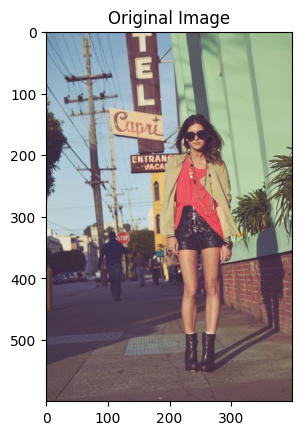

Unused or unrecognized kwargs: truncation, padding.


./colorful_fashion_dataset/JPEGImages/11674.jpg
Ground Truth Bounding Boxes: {3: (206, 204, 286, 335), 2: (180, 198, 310, 329), 9: (223, 488, 275, 552), 5: (204, 282, 290, 371)}


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for pants vs skirt: [0.1896213 0.8103787]


Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for shorts vs dress: [0.9595602  0.04043981]
Softmax probabilities for shorts vs skirt: [0.8771144  0.12288561]


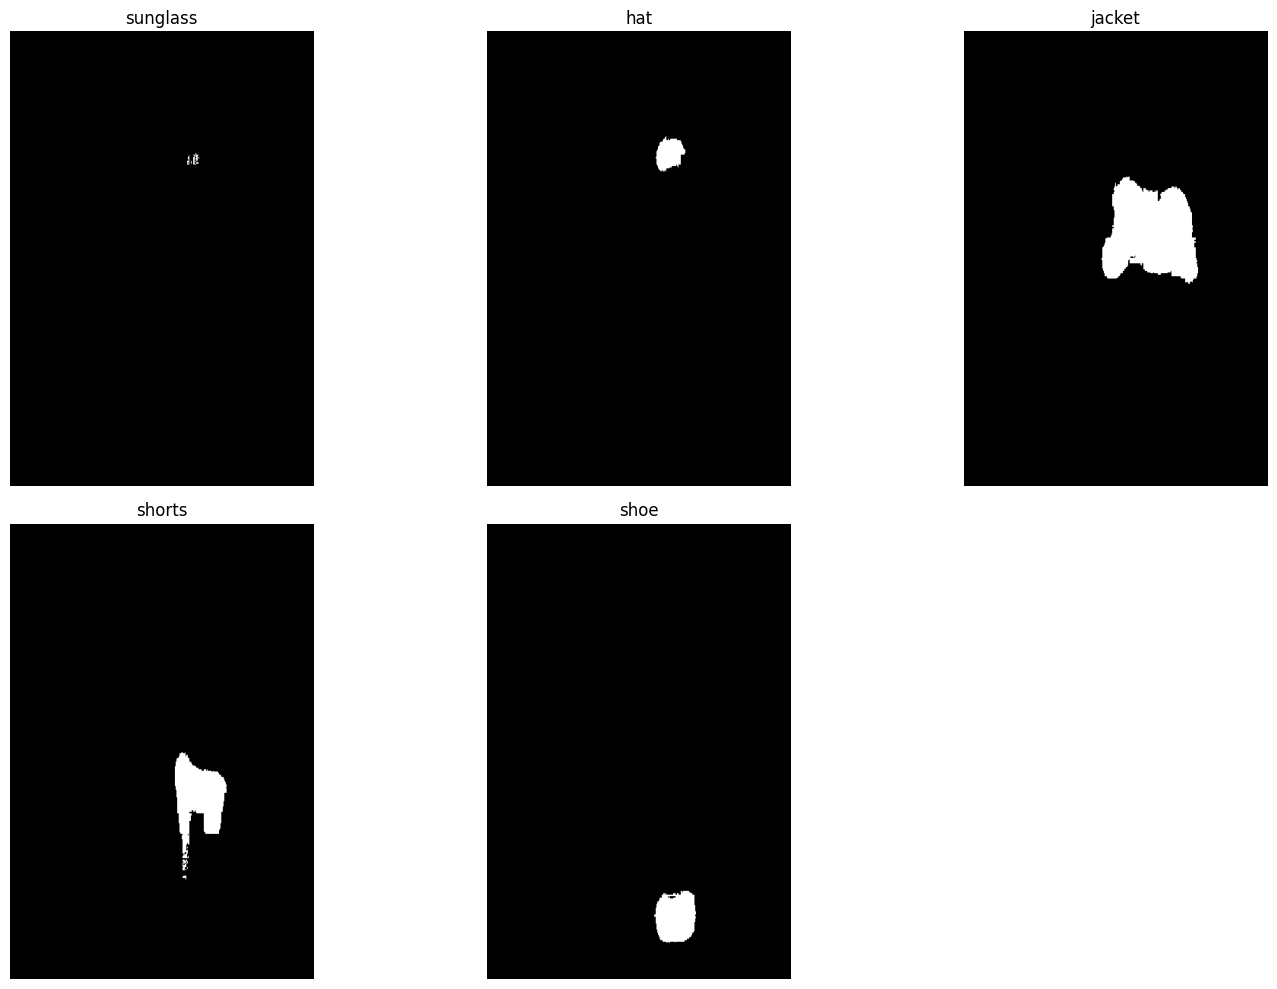

Mask_Bounding Boxes: {0: (233, 162, 248, 176), 1: (222, 140, 260, 185), 2: (181, 193, 307, 333), 5: (217, 302, 284, 468), 9: (220, 484, 274, 551)}
Class ID: 3 is not present in predicted bounding boxes.
Class ID: 2, Overlap Area: 16506, Overlap Ratio: 0.9692307692307692
Class ID: 9, Overlap Area: 3213, Overlap Ratio: 0.9654447115384616
Class ID: 5, Overlap Area: 4623, Overlap Ratio: 0.603997909589757
overlap area of two bounding boxes:3


In [39]:
import os
import numpy as np
from PIL import Image, ImageDraw
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import matplotlib.pyplot as plt
import torch





# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"





# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")




# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')




# print(f'trainval_file: {trainval_file}')
# print(f'test_file: {test_file}')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")



# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]




# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

num_trainval = len(trainval_images)
num_test = len(test_images)

# print(f'Number of images in train/validation set: {num_trainval}')
# print(f'Number of images in test set: {num_test}')
# print(f'Type of trainval_images: {type(trainval_images)}')
# print(f'Type of test_images: {type(test_images)}')

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
conflict_dict = {



    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": ["skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts": ["pants", "dress", "skirt"],
    "skirt": ["pants, shorts", "dress"],
    "bag": [],
    "shoe": [],
}


# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image, prompts, model, processor):

    segmentation_results = {}
    for prompt in prompts:
        seg_inputs = processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        # Ensure the mask has the same size as the original image
        segmentation = Image.fromarray(segmentation).resize(image.size, Image.NEAREST)
        segmentation = np.array(segmentation)

        segmentation_results[prompt] = segmentation

    return segmentation_results





# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image):

    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image, return_tensors="pt", padding=True, truncation=True)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break


    return items










# Function to extract ground truth bounding boxes from annotation file
def extract_ground_truth_bboxes(annotation_file):
    ground_truth_bboxes = {}
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            xmin = int(parts[1])
            ymin = int(parts[2])
            xmax = int(parts[3])
            ymax = int(parts[4])
            ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)


    return ground_truth_bboxes




def get_bounding_boxes_from_masks(segmentation_results):  # the function aims to get the bounding boxes from segmentation max of clothing items after resolve conflict(not directly after initial seg results from clip seg)

    bounding_boxes = {}
    for item, mask in segmentation_results.items():
        y_indices, x_indices = np.where(mask > 0)    # returns the indices of segmenation mask(2d array) where the mask is positive
        if len(y_indices) == 0 or len(x_indices)== 0:
            continue

   # get the minimum and amximum of coordinates
        x_min = x_indices.min()
        x_max = x_indices.max()
        y_min = y_indices.min()
        y_max = y_indices.max()


        class_id = prompt_class_id[item]
        bounding_boxes[class_id] = (x_min, y_min, x_max, y_max)

    return bounding_boxes




def calculate_overlap_area(boxA, boxB):

    xA = max(boxA[0], boxB[0])  #xA = max(159, 245) -->xA = 245
    yA = max(boxA[1], boxB[1])  #yA = max(113, 264) --> yA = 264
    xB = min(boxA[2], boxB[2])  # xB = min(270, 130) --> xB = 130
    yB = min(boxA[3], boxB[3])  # yB = min(195, 130) -->yB = 130
    inter_width = max(0, xB - xA)  # inter_width = max(0, 130 - 245) ----> 0
    inter_height = max(0, yB - yA)  # inter_height = max(0, 130 - 264)    -----> 0
    overlap_area = inter_width * inter_height

    return overlap_area






   # Function to evaluate overlap
def evaluate_overlap(pred_bboxes, gt_bboxes, threshold=0.6):
    matches = 0
    for class_id, gt_box in gt_bboxes.items():
        if class_id in pred_bboxes:
            pred_box = pred_bboxes[class_id]
            overlap_area = calculate_overlap_area(gt_box, pred_box)
            gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
            overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
            print(f"Class ID: {class_id}, Overlap Area: {overlap_area}, Overlap Ratio: {overlap_ratio}")
            if overlap_ratio > threshold:
                matches += 1
        else:
            print(f"Class ID: {class_id} is not present in predicted bounding boxes.")


    return matches




# Segment clothing items with CLIPSeg and visualize results
def segment_and_visualize(image, prompts, model, processor):
    segmentation_results = generate_segmentation_masks(image, prompts, model, processor)

    # Resolve conflicts
    resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image)

    # Store the segmentation results for the resolved items
    resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}

    num_prompts = len(resolved_segmentation_results)
    num_columns = 3
    num_rows = (num_prompts + num_columns - 1) // num_columns  # Ensure the correct number of rows
    plt.figure(figsize=(15, 5 * num_rows))

    # # Ensure image is a PIL Image and get its size
    # if isinstance(image, np.ndarray):
    #     image = Image.fromarray(image)
    # assert isinstance(image, Image.Image), "image must be a PIL.Image object"
    # print(f"Image size: {image.size}")

    for idx, (prompt, segmentation_image) in enumerate(resolved_segmentation_results.items()):
        plt.subplot(num_rows, num_columns, idx + 1)
        plt.imshow(segmentation_image, cmap='gray')
        plt.title(f'{prompt}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


    return resolved_segmentation_results

class_id_prompt = {
    0: 'sunglass',
    1: 'hat',
    2: 'jacket',
    3: 'shirt',
    4: 'pants',
    5: 'shorts',
    6: 'skirt',
    7: 'dress',
    8: 'bag',
    9: 'shoe'
}
prompt_class_id = {v: k for k, v in class_id_prompt.items()}

# Select a random image from the train/validation set
img_path = trainval_image_paths[60]
image = Image.open(img_path).convert('RGB')
plt.imshow(image)
plt.title("Original Image")
plt.show()
print(img_path)


# Extract ground truth bounding boxes from annotation file
annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
ground_truth_bboxes = extract_ground_truth_bboxes(annotation_file)
print("Ground Truth Bounding Boxes:", ground_truth_bboxes)

# Segment and visualize the results
segmentation_results = segment_and_visualize(image, prompts, model, processor)
mask_bounding_boxes = get_bounding_boxes_from_masks(segmentation_results)
print("Mask_Bounding Boxes:", bounding_boxes)

# # Draw the bounding boxes for class id 9
# image_with_bboxes = draw_bounding_boxes(image, bounding_boxes, ground_truth_bboxes, target_class_id=9)
# plt.imshow(image_with_bboxes)
# plt.title("Image with Bounding Box for Class ID 9")
# plt.show()

#calculate overlap area
overlap = evaluate_overlap(mask_bounding_boxes, ground_truth_bboxes)
print(f'overlap area of two bounding boxes:{overlap}')





### Add Accuracy to previous code

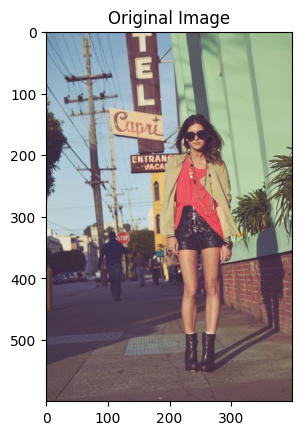

Unused or unrecognized kwargs: truncation, padding.


./colorful_fashion_dataset/JPEGImages/11674.jpg
Ground Truth Bounding Boxes: {3: (206, 204, 286, 335), 2: (180, 198, 310, 329), 9: (223, 488, 275, 552), 5: (204, 282, 290, 371)}


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for pants vs skirt: [0.1896213 0.8103787]


Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for shorts vs dress: [0.9595602  0.04043981]
Softmax probabilities for shorts vs skirt: [0.8771144  0.12288561]


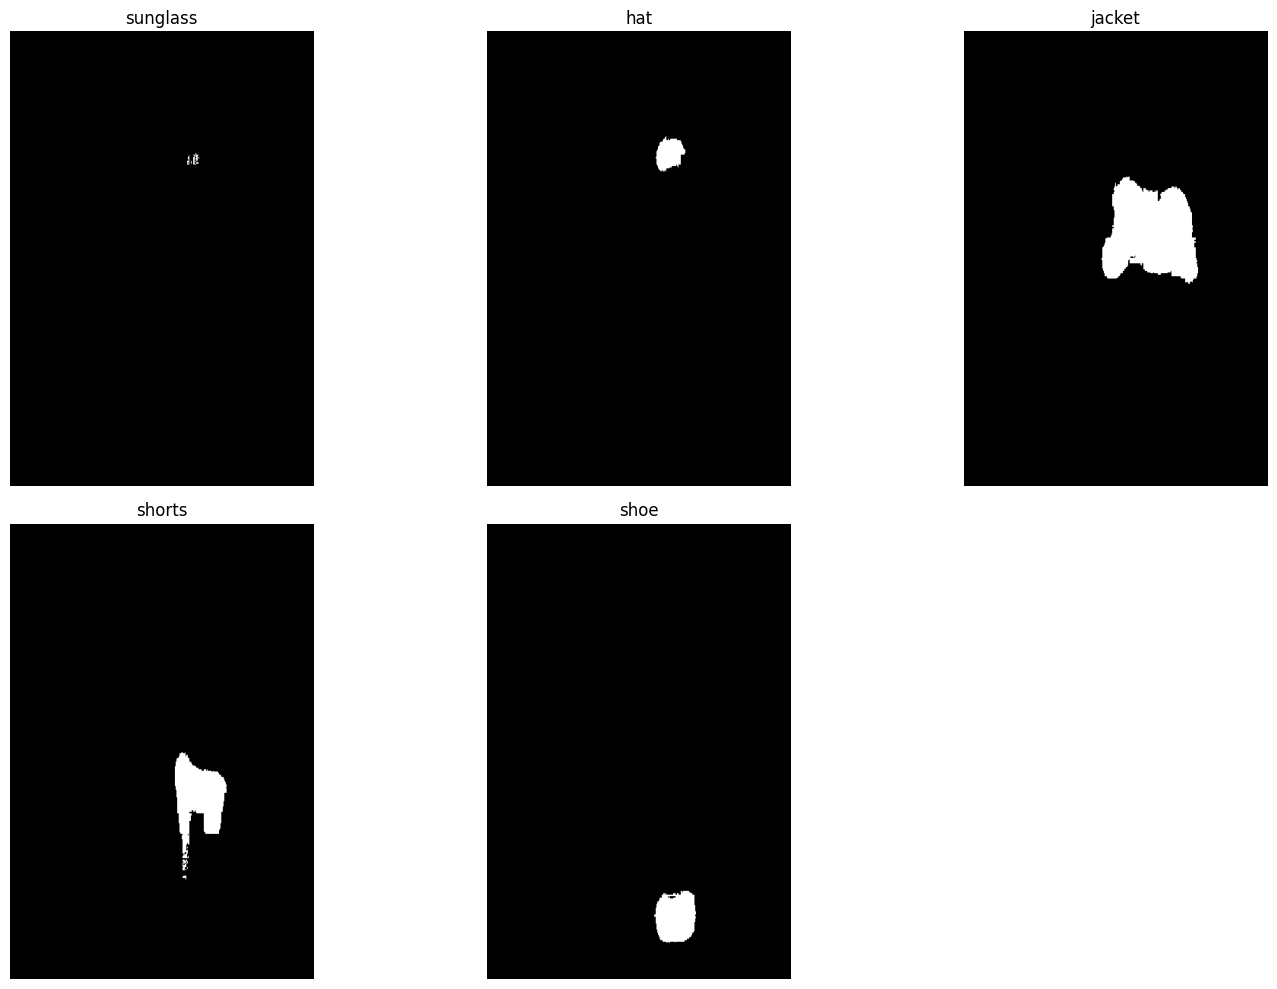

Unused or unrecognized kwargs: truncation, padding.


Mask_Bounding Boxes: {0: (233, 162, 248, 176), 1: (222, 140, 260, 185), 2: (181, 193, 307, 333), 5: (217, 302, 284, 468), 9: (220, 484, 274, 551)}
Ground Truth Bounding Boxes: {3: (206, 204, 286, 335), 2: (180, 198, 310, 329), 9: (223, 488, 275, 552), 5: (204, 282, 290, 371)}
Class ID: 3 is not present in predicted bounding boxes.
Class ID: 2, Overlap Area: 16506, Overlap Ratio: 0.9692307692307692
Class ID: 9, Overlap Area: 3213, Overlap Ratio: 0.9654447115384616
Class ID: 5, Overlap Area: 4623, Overlap Ratio: 0.603997909589757
overlap area of two bounding boxes:3


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for pants vs skirt: [0.1896213 0.8103787]


Unused or unrecognized kwargs: truncation, padding.


Softmax probabilities for shorts vs dress: [0.9595602  0.04043981]
Softmax probabilities for shorts vs skirt: [0.8771144  0.12288561]
 Accuracy per Image: 0.00%
 Accuracy per Item: 75.00%


In [46]:
import os
import glob
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import matplotlib.pyplot as plt
import random
import torch


# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"


# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# print(f'trainval_file: {trainval_file}')
# print(f'test_file: {test_file}')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

num_trainval = len(trainval_images)
num_test = len(test_images)

# print(f'Number of images in train/validation set: {num_trainval}')
# print(f'Number of images in test set: {num_test}')
# print(f'Type of trainval_images: {type(trainval_images)}')
# print(f'Type of test_images: {type(test_images)}')

# # Get all image paths
# all_images_path = glob.glob(os.path.join(image_path, '*.jpg'))
# print(f'Total images found: {len(all_images_path)}')

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]


# Define conflict dictionary
conflict_dict = {


    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": [ "skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],  
    "shorts":["pants", "dress", "skirt"],
    "skirt":["pants, shorts", "dress"],
    "bag":[],
    "shoe":[],

}


# Function to generate segmentation masks for all prompts
# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image, prompts, model, processor):

    segmentation_results = {}
    for prompt in prompts:
        seg_inputs = processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        # Ensure the mask has the same size as the original image
        segmentation = Image.fromarray(segmentation).resize(image.size, Image.NEAREST)
        segmentation = np.array(segmentation)

        segmentation_results[prompt] = segmentation

    return segmentation_results




# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image, return_tensors="pt", padding=True, truncation=True)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)

                    
                 
                    break
    
    return items

def get_bounding_boxes_from_masks(segmentation_results):  # the function aims to get the bounding boxes from segmentation max of clothing items after resolve conflict(not directly after initial seg results from clip seg)

    bounding_boxes = {}

    for item, mask in segmentation_results.items():
        y_indices, x_indices = np.where(mask > 0)    # returns the indices of segmenation mask(2d array) where the mask is positive
        if len(y_indices) == 0 or len(x_indices)== 0:
            continue

   # get the minimum and amximum of coordinates
        x_min = x_indices.min()
        x_max = x_indices.max()
        y_min = y_indices.min()
        y_max = y_indices.max()


        class_id = prompt_class_id[item]
        bounding_boxes[class_id] = (x_min, y_min, x_max, y_max)

    return bounding_boxes



#function to convert ground truth bounding box
# Function to extract ground truth bounding boxes from annotation file
def extract_ground_truth_bboxes(annotation_file):
    ground_truth_bboxes = {}
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            xmin = int(parts[1])
            ymin = int(parts[2])
            xmax = int(parts[3])
            ymax = int(parts[4])
            ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)


    return ground_truth_bboxes





def calculate_overlap_area(boxA, boxB):

    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1]) 
    xB = min(boxA[2], boxB[2]) 
    yB = min(boxA[3], boxB[3]) 
    inter_width = max(0, xB - xA) 
    inter_height = max(0, yB - yA) 
    overlap_area = inter_width * inter_height

    return overlap_area




    # Function to evaluate overlap
def evaluate_overlap(pred_bboxes, gt_bboxes, threshold=0.6):
    matches = 0
    for class_id, gt_box in gt_bboxes.items():
        if class_id in pred_bboxes:
            pred_box = pred_bboxes[class_id]
            overlap_area = calculate_overlap_area(gt_box, pred_box)
            gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
            overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
            print(f"Class ID: {class_id}, Overlap Area: {overlap_area}, Overlap Ratio: {overlap_ratio}")
            if overlap_ratio > threshold:
                matches += 1
        else:
            print(f"Class ID: {class_id} is not present in predicted bounding boxes.")
    return matches






def calculate_accuracy(image_paths, threshold=0.6):
    correct_images = 0
    correct_items = 0
    total_items = 0
    for img_path in image_paths:              #loop through each image path in image_paths
        image = Image.open(img_path).convert('RGB')
        annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
        gt_bboxes = extract_ground_truth_bboxes(annotation_file)
        
        segmentation_results = generate_segmentation_masks(image, prompts, model, processor)
        resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image)
        resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}
        pred_bboxes = get_bounding_boxes_from_masks(resolved_segmentation_results)
        
        image_correct = True
        for class_id, gt_box in gt_bboxes.items():
            total_items += 1

            if class_id in pred_bboxes:
                pred_box = pred_bboxes[class_id]
                overlap_area = calculate_overlap_area(gt_box, pred_box)
                gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
                if overlap_ratio > threshold:
                    correct_items +=1
                else:
                    image_correct = False
            else:
                image_correct = False

        if image_correct:
            image_correct+=1


    image_accuracy = correct_images / len(image_paths)
    item_accuracy = correct_items / total_items


    return image_accuracy, item_accuracy



# Segment clothing items with CLIPSeg and visualize results
def segment_and_visualize(image, prompts, model, processor):
    segmentation_results = generate_segmentation_masks(image, prompts, model, processor)

    # Resolve conflicts
    resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image)

    # Store the segmentation results for the resolved items
    resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}

    num_prompts = len(resolved_segmentation_results)
    num_columns = 3
    num_rows = (num_prompts + num_columns - 1) // num_columns  # Ensure the correct number of rows
    plt.figure(figsize=(15, 5 * num_rows))

    

    for idx, (prompt, segmentation_image) in enumerate(resolved_segmentation_results.items()):
        plt.subplot(num_rows, num_columns, idx + 1)
        plt.imshow(segmentation_image, cmap='gray')
        plt.title(f'{prompt}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


    return resolved_segmentation_results

class_id_prompt = {
    0: 'sunglass',
    1: 'hat',
    2: 'jacket',
    3: 'shirt',
    4: 'pants',
    5: 'shorts',
    6: 'skirt',
    7: 'dress',
    8: 'bag',
    9: 'shoe'
}
prompt_class_id = {v: k for k, v in class_id_prompt.items()}

# Select a random image from the train/validation set
img_path = trainval_image_paths[60]
image = Image.open(img_path).convert('RGB')
plt.imshow(image)
plt.title("Original Image")
plt.show()
print(img_path)





# Extract ground truth bounding boxes from annotation file
annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
ground_truth_bboxes = extract_ground_truth_bboxes(annotation_file)
print("Ground Truth Bounding Boxes:", ground_truth_bboxes)



# Segment and visualize the results
segmentation_results = segment_and_visualize(image, prompts, model, processor)
mask_bounding_boxes = get_bounding_boxes_from_masks(segmentation_results)
print("Mask_Bounding Boxes:", bounding_boxes)

# Extract ground truth bounding boxes from annotation file
annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
ground_truth_bboxes = extract_ground_truth_bboxes(annotation_file)
print("Ground Truth Bounding Boxes:", ground_truth_bboxes)


# # Draw the bounding boxes for class id 9
# image_with_bboxes = draw_bounding_boxes(image, bounding_boxes, ground_truth_bboxes, target_class_id=9)
# plt.imshow(image_with_bboxes)
# plt.title("Image with Bounding Box for Class ID 9")
# plt.show()

#calculate overlap area
overlap = evaluate_overlap(mask_bounding_boxes, ground_truth_bboxes)
print(f'overlap area of two bounding boxes:{overlap}')



# Calculate accuracy
image_accuracy, item_accuracy = calculate_accuracy([img_path])
print(f" Accuracy per Image: {image_accuracy * 100:.2f}%")
print(f" Accuracy per Item: {item_accuracy * 100:.2f}%")





### Get Accuracy for 30 images in dataset

In [5]:
import os
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import torch

# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

num_trainval = len(trainval_images)
num_test = len(test_images)

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
conflict_dict = {
    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": ["skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts": ["pants", "dress", "skirt"],
    "skirt": ["pants, shorts", "dress"],
    "bag": [],
    "shoe": [],
}

class_id_prompt = {
    0: 'sunglass',
    1: 'hat',
    2: 'jacket',
    3: 'shirt',
    4: 'pants',
    5: 'shorts',
    6: 'skirt',
    7: 'dress',
    8: 'bag',
    9: 'shoe'
}
prompt_class_id = {v: k for k, v in class_id_prompt.items()}

# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        seg_inputs = processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        segmentation = Image.fromarray(segmentation).resize(image.size, Image.NEAREST)
        segmentation = np.array(segmentation)

        segmentation_results[prompt] = segmentation

    return segmentation_results

# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                inputs = processor(text=[item, conf], images=image, return_tensors="pt", padding=True, truncation=True).to(device)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break
    return items

def get_bounding_boxes_from_masks(segmentation_results):
    bounding_boxes = {}
    for item, mask in segmentation_results.items():
        y_indices, x_indices = np.where(mask > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue
        xmin = x_indices.min()
        xmax = x_indices.max()
        ymin = y_indices.min()
        ymax = y_indices.max()
        bounding_boxes[prompt_class_id[item]] = (xmin, ymin, xmax, ymax)
    return bounding_boxes

# Function to extract ground truth bounding boxes from annotation file
def extract_ground_truth_bboxes(annotation_file):
    ground_truth_bboxes = {}
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            xmin = int(parts[1])
            ymin = int(parts[2])
            xmax = int(parts[3])
            ymax = int(parts[4])
            ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)
    return ground_truth_bboxes

# Function to calculate overlap area
def calculate_overlap_area(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter_width = max(0, xB - xA)
    inter_height = max(0, yB - yA)
    overlap_area = inter_width * inter_height
    return overlap_area

# Function to evaluate overlap
def evaluate_overlap(pred_bboxes, gt_bboxes, threshold=0.6):
    matches = 0
    for class_id, gt_box in gt_bboxes.items():
        if class_id in pred_bboxes:
            pred_box = pred_bboxes[class_id]
            overlap_area = calculate_overlap_area(gt_box, pred_box)
            gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
            overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
            print(f"Class ID: {class_id}, Overlap Area: {overlap_area}, Overlap Ratio: {overlap_ratio}")
            if overlap_ratio > threshold:
                matches += 1
        else:
            print(f"Class ID: {class_id} is not present in predicted bounding boxes.")
    return matches

# Function to calculate accuracy
def calculate_accuracy(image_paths, threshold=0.6):
    correct_images = 0
    correct_items = 0
    total_items = 0

    # Process only the first 100 images
    image_paths = image_paths[:30]

    for img_path in image_paths:
        image = Image.open(img_path).convert('RGB')
        annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
        gt_bboxes = extract_ground_truth_bboxes(annotation_file)

        segmentation_results = generate_segmentation_masks(image, prompts, model, processor)
        resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image)
        resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}
        pred_bboxes = get_bounding_boxes_from_masks(resolved_segmentation_results)

        image_correct = True
        for class_id, gt_box in gt_bboxes.items():
            total_items += 1
            if class_id in pred_bboxes:
                pred_box = pred_bboxes[class_id]
                overlap_area = calculate_overlap_area(gt_box, pred_box)
                gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
                if overlap_ratio > threshold:
                    correct_items += 1
                else:
                    image_correct = False
            else:
                image_correct = False

        if image_correct:
            correct_images += 1

    image_accuracy = correct_images / len(image_paths)
    item_accuracy = correct_items / total_items

    return image_accuracy, item_accuracy

# Calculate accuracy for the first 100 images in the train/validation dataset
image_accuracy, item_accuracy = calculate_accuracy(trainval_image_paths)
print(f"Accuracy per Image: {image_accuracy * 100:.2f}%")
print(f"Accuracy per Item: {item_accuracy * 100:.2f}%")

Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.01801996 0.9819801 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.28281555 0.7171844 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.03577211 0.96422786]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.32585606 0.6741439 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.561714   0.43828595]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.08964448 0.91035557]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.832465   0.16753498]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.22633244 0.7736676 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.12350225 0.8764978 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.48340502 0.516595  ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.7042118 0.2957882]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.71403563 0.28596434]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.9558492  0.04415079]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.8433619  0.15663807]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.4056345 0.5943655]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.83317995 0.16682011]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.48228478 0.51771516]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.8073049  0.19269508]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.07489034 0.9251097 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.9860212  0.01397877]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.74929905 0.25070098]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs dress: [0.13739836 0.8626017 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.69754493 0.30245504]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.93711907 0.06288097]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.9137298  0.08627024]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.03130914 0.9686909 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.1572359 0.8427641]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.07711069 0.9228893 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.08269489 0.9173052 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.00980158 0.9901985 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.10108503 0.898915  ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.29216158 0.70783836]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.18704972 0.8129503 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.29020235 0.7097977 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.82553613 0.17446384]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.10880885 0.8911912 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.93176246 0.06823759]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.07333861 0.92666143]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.28900433 0.7109957 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.04805512 0.9519449 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.39065972 0.6093403 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.763945   0.23605503]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.5068708  0.49312922]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs dress: [0.6888361  0.31116393]


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.6300867  0.36991328]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.9567535  0.04324655]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.9958158  0.00418416]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.452673   0.54732704]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.9277561  0.07224389]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.8785356  0.12146434]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs dress: [0.59667873 0.40332124]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.06490319 0.93509686]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.52931184 0.4706881 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.20695165 0.7930484 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.23723511 0.76276493]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.8506143  0.14938565]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.97795516 0.0220448 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.95756114 0.04243885]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.14947367 0.8505264 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.9456299  0.05437009]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.10802436 0.89197564]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.05562633 0.94437367]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.04678718 0.9532128 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.97324973 0.02675029]


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.8896093  0.11039078]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.9609393  0.03906075]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.97767454 0.0223255 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.01503711 0.9849629 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs dress: [0.00612144 0.99387854]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.27565724 0.7243427 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.86775136 0.1322486 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.8505518  0.14944819]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs dress: [0.39813903 0.60186094]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.10751615 0.89248383]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.07473271 0.9252673 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.40537515 0.5946248 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.9145646  0.08543541]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.9298815  0.07011844]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs dress: [0.9390748  0.06092518]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.6953417  0.30465832]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.332511   0.66748893]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.44835928 0.55164075]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.82526815 0.17473184]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.9950825  0.00491755]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.99005437 0.00994558]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.056125 0.943875]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.0334432 0.9665568]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.8493806  0.15061934]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs skirt: [0.32119507 0.678805  ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.5241373  0.47586268]


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.04180795 0.95819205]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.17767176 0.8223282 ]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shorts vs skirt: [0.44043964 0.55956036]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for skirt vs dress: [0.38738972 0.6126103 ]


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for shirt vs dress: [0.8068752 0.1931248]


Unused or unrecognized kwargs: padding, truncation.


Softmax probabilities for pants vs shorts: [0.19887552 0.80112445]
Softmax probabilities for shorts vs skirt: [0.7250445  0.27495554]
Accuracy per Image: 36.67%
Accuracy per Item: 73.15%


### Get Accuracy for the 100 images in dataset

In [2]:
#name of dataset --> colorful fashion dataset for object detection
# link of the dataset for download :https://www.kaggle.com/datasets/nguyngiabol/colorful-fashion-dataset-for-object-detection


import os  # Provides functions for interacting with the operating system
import requests  # Used for making HTTP requests, such as downloading files
import gzip  # Handles the extraction of .gz files
import shutil  # Provides high-level file operations like copying files
import numpy as np  # For numerical operations like handling arrays
import matplotlib.pyplot as plt  # For plotting and visualizing data
import random  # For generating random numbers
import cv2  # OpenCV library for image processing
import glob  # Used for file pattern matching






# Transformer models and tokenizers for vision tasks
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer, CLIPSegProcessor, CLIPSegForImageSegmentation

# PyTorch library for deep learning
import torch
from torchvision import transforms  # For data transformation in PyTorch

# PIL library for image processing
from PIL import Image, ImageDraw




# Check if GPU is available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

num_trainval = len(trainval_images)
num_test = len(test_images)

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
conflict_dict = {
    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": ["skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts": ["pants", "dress", "skirt"],
    "skirt": ["pants, shorts", "dress"],
    "bag": [],
    "shoe": [],
}

# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        seg_inputs = processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        # Ensure the mask has the same size as the original image
        segmentation = Image.fromarray(segmentation).resize(image.size, Image.NEAREST)
        segmentation = np.array(segmentation)

        segmentation_results[prompt] = segmentation

    return segmentation_results

# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image, return_tensors="pt", padding=True, truncation=True).to(device)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break
    return items

def get_bounding_boxes_from_masks(segmentation_results):
    bounding_boxes = {}
    class_ids = {
        "sunglass": 0,
        "hat": 1,
        "jacket": 2,
        "shirt": 3,
        "pants": 4,
        "shorts": 5,
        "skirt": 6,
        "dress": 7,
        "bag": 8,
        "shoe": 9
    }
    for item, mask in segmentation_results.items():
        y_indices, x_indices = np.where(mask > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue
        xmin = x_indices.min()
        xmax = x_indices.max()
        ymin = y_indices.min()
        ymax = y_indices.max()
        bounding_boxes[class_ids[item]] = (xmin, ymin, xmax, ymax)
    return bounding_boxes

# Function to extract ground truth bounding boxes from annotation file
def extract_ground_truth_bboxes(annotation_file):
    ground_truth_bboxes = {}
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            xmin = int(parts[1])
            ymin = int(parts[2])
            xmax = int(parts[3])
            ymax = int(parts[4])
            ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)
    return ground_truth_bboxes

# calculate overlap
def calculate_overlap_area(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter_width = max(0, xB - xA)
    inter_height = max(0, yB - yA)
    overlap_area = inter_width * inter_height
    return overlap_area

# Function to evaluate overlap
def evaluate_overlap(pred_bboxes, gt_bboxes, threshold=0.6):

    matches = 0
    for class_id, gt_box in gt_bboxes.items():
        if class_id in pred_bboxes:
            pred_box = pred_bboxes[class_id]
            overlap_area = calculate_overlap_area(gt_box, pred_box)
            gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
            overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
            if overlap_ratio > threshold:
                matches += 1

    return matches

# Function to calculate accuracy
def calculate_accuracy(image_paths, threshold=0.6):

    correct_images = 0
    correct_items = 0
    total_items = 0

    image_paths = image_paths[:100]

    for img_path in image_paths:
        
        image = Image.open(img_path).convert('RGB')
        annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
        gt_bboxes = extract_ground_truth_bboxes(annotation_file)
        
        segmentation_results = generate_segmentation_masks(image, prompts, model, processor)
        resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image)
        resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}
        pred_bboxes = get_bounding_boxes_from_masks(resolved_segmentation_results)
        
        image_correct = True
        for class_id, gt_box in gt_bboxes.items():
            total_items += 1
            if class_id in pred_bboxes:
                pred_box = pred_bboxes[class_id]
                overlap_area = calculate_overlap_area(gt_box, pred_box)
                gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
                if overlap_ratio > threshold:
                    correct_items += 1
                else:
                    image_correct = False
            else:
                image_correct = False

        if image_correct:
            correct_images += 1

    image_accuracy = correct_images / len(image_paths) if len(image_paths) > 0 else 0
    item_accuracy = correct_items / total_items if total_items > 0 else 0

    return image_accuracy, item_accuracy

# Calculate accuracy for the whole train/validation dataset
image_accuracy, item_accuracy = calculate_accuracy(trainval_image_paths)
print(f"Image Accuracy: {image_accuracy * 100:.2f}%")
print(f"Item Accuracy: {item_accuracy * 100:.2f}%")



Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or unrecognized kwargs: truncation, padding.
Unused or un

Image Accuracy: 29.00%
Item Accuracy: 69.92%


In [4]:
import os
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import torch

class FashionSegmentationEvaluator:

    def __init__(self, dataset_path, prompts):
        print('init function works properly')

        self.dataset_path = dataset_path
        self.prompts = prompts
        self.conflict_dict = {
            "sunglass": [],
            "hat": [],
            "jacket": [],
            "dress": ["skirt", "shorts", "pants", "shirt"],
            "shirt": ["dress"],
            "pants": ["dress", "skirt", "shorts"],
            "shorts": ["pants", "dress", "skirt"],
            "skirt": ["pants, shorts", "dress"],
            "bag": [],
            "shoe": [],
        }


        # Initialize paths
        self.image_sets_path = os.path.join(dataset_path, "ImageSets/Main")
        self.image_path = os.path.join(dataset_path, "JPEGImages")
        self.annotations_path = os.path.join(dataset_path, "Annotations")
        self.new_annotation_path = os.path.join(dataset_path, "Annotations_txt")

        # Check paths
        if not os.path.exists(self.image_sets_path):
            raise FileNotFoundError(f"{self.image_sets_path} does not exist.")
        if not os.path.exists(self.image_path):
            raise FileNotFoundError(f"{self.image_path} does not exist.")
        
        # Initialize device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Initialize CLIPSeg model and processor
        self.model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(self.device)
        self.processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
        self.segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined").to(self.device)
        self.segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

        # Load image sets
        self.trainval_images = self.read_image_list(file_name="trainval.txt")
        self.test_images = self.read_image_list(file_name="test.txt")

        self.trainval_image_paths = [os.path.join(self.image_path, f"{img_id}.jpg") for img_id in self.trainval_images]
        self.test_image_paths = [os.path.join(self.image_path, f"{img_id}.jpg") for img_id in self.test_images]

    def read_image_list(self, file_name):
        file_path = os.path.join(self.image_sets_path, file_name)
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"{file_path} does not exist.")
        with open(file_path, "r") as f:
            return [line.strip() for line in f.readlines()]

    def generate_segmentation_masks(self, image):
        segmentation_results = {}
        for prompt in self.prompts:
            seg_inputs = self.processor(text=[prompt], images=image, return_tensors="pt", padding=True, truncation=True).to(self.device)
            with torch.no_grad():
                seg_outputs = self.model(**seg_inputs)
                logits = seg_outputs.logits

            segmentation = torch.sigmoid(logits).cpu().numpy()
            segmentation = (segmentation > 0.5).astype(np.uint8)

            if np.sum(segmentation) == 0:
                continue

            if segmentation.ndim == 3:
                segmentation = segmentation.squeeze(axis=0)

            segmentation = Image.fromarray(segmentation).resize(image.size, Image.NEAREST)
            segmentation = np.array(segmentation)
            # plt.imshow(segmentation, cmap = 'gray')
            # plt.show()

            segmentation_results[prompt] = segmentation

        return segmentation_results

    def resolve_conflicts(self, items, image):
        i = 0
        while i < len(items):
            item = items[i]
            conflicts = set(items).intersection(set(self.conflict_dict[item]))
            if not conflicts:
                i += 1
            else:
                for conf in conflicts:
                    # Re-evaluate the conflicting pair
                    inputs = self.processor(text=[item, conf], images=image, return_tensors="pt").to(self.device)
                    with torch.no_grad():
                        outputs = self.model(**inputs)
                    logits_per_image = outputs.logits_per_image
                    probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                    if probs[0] > probs[1]:
                        items.remove(conf)
                    else:
                        items.remove(item)
                        break
        return items

    def get_bounding_boxes_from_masks(self, segmentation_results):
        bounding_boxes = {}
        class_ids = {prompt: idx for idx, prompt in enumerate(self.prompts)}
        for item, mask in segmentation_results.items():
            y_indices, x_indices = np.where(mask > 0)
            if len(y_indices) == 0 or len(x_indices) == 0:
                continue
            xmin = x_indices.min()
            xmax = x_indices.max()
            ymin = y_indices.min()
            ymax = y_indices.max()
            bounding_boxes[class_ids[item]] = (xmin, ymin, xmax, ymax)
        return bounding_boxes

    def extract_ground_truth_bboxes(self, annotation_file):
        ground_truth_bboxes = {}
        with open(annotation_file, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])
                xmin = int(parts[1])
                ymin = int(parts[2])
                xmax = int(parts[3])
                ymax = int(parts[4])
                ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)
        return ground_truth_bboxes

    def calculate_overlap_area(self, boxA, boxB):
        xA = max(boxA[0], boxB[0])
        yA = max(boxA[1], boxB[1])
        xB = min(boxA[2], boxB[2])
        yB = min(boxB[3], boxB[3])
        inter_width = max(0, xB - xA)
        inter_height = max(0, yB - yA)
        overlap_area = inter_width * inter_height
        return overlap_area

    def evaluate_overlap(self, pred_bboxes, gt_bboxes, threshold=0.6):
        matches = 0
        for class_id, gt_box in gt_bboxes.items():
            if class_id in pred_bboxes:
                pred_box = pred_bboxes[class_id]
                overlap_area = self.calculate_overlap_area(gt_box, pred_box)
                gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
                if overlap_ratio > threshold:
                    matches += 1
        return matches

    def calculate_accuracy(self, image_paths, threshold=0.6):
        correct_images = 0
        correct_items = 0
        total_items = 0

        for img_path in image_paths:
            image = Image.open(img_path).convert('RGB')
            annotation_file = os.path.join(self.new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
            gt_bboxes = self.extract_ground_truth_bboxes(annotation_file)
            
            segmentation_results = self.generate_segmentation_masks(image)
            resolved_items = self.resolve_conflicts(list(segmentation_results.keys()), image)
            resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}
            pred_bboxes = self.get_bounding_boxes_from_masks(resolved_segmentation_results)
            
            image_correct = True
            for class_id, gt_box in gt_bboxes.items():
                total_items += 1
                if class_id in pred_bboxes:
                    pred_box = pred_bboxes[class_id]
                    overlap_area = self.calculate_overlap_area(gt_box, pred_box)
                    gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                    overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
                    if overlap_ratio > threshold:
                        correct_items += 1
                    else:
                        image_correct = False
                else:
                    image_correct = False

            if image_correct:
                correct_images += 1

        image_accuracy = correct_images / len(image_paths) if len(image_paths) > 0 else 0
        item_accuracy = correct_items / total_items if total_items > 0 else 0

        return image_accuracy, item_accuracy

    def evaluate(self, num_images):
        image_accuracy, item_accuracy = self.calculate_accuracy(self.trainval_image_paths[:num_images])
        print(f"Train/Validation Image Accuracy: {image_accuracy * 100:.2f}%")
        print(f"Train/Validation Item Accuracy: {item_accuracy * 100:.2f}%")






dataset_path = "./colorful_fashion_dataset"
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

evaluator = FashionSegmentationEvaluator(dataset_path, prompts)
evaluator.evaluate(100)
# image_path = evaluator.trainval_image_paths[9]
# image = Image.open(image_path)
# plt.imshow(image)
# plt.show()
# seg_results = evaluator.generate_segmentation_masks(image)
# print(type(seg_results))
# seg_results= list(seg_results.keys())
# print(seg_results)

# items = evaluator.resolve_conflicts(seg_results, image)
# print(items)























init function works properly


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


AttributeError: 'CLIPSegImageSegmentationOutput' object has no attribute 'logits_per_image'

### build a data loader and use batch processing for whole dataset accuracy

In [17]:
import os
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, ToTensor
import pandas as pd



class CostumImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform = None):
        self.img_labels = glob.glob(os.path.join(img_dir, "*.jpg"))
        self.img_dir = img_dir
        self.transform = transform 


    def __len__(self):
        return len(self.img_labels)
    

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels[idx])        #retireves the filename of the image 
        image = Image.open(img_path).convert('RGB')
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform[image]
        return image, label 
    
# define paths

annotation_file = "./colorful_fashion_dataset/Annotations.txt"
img_dir = "./colorful_fashion_dataset/JPEGImages"

# define transformation
transform = Compose([
    Resize((128, 128)),
    ToTensor(),
    
])
 

dataset = CostumImageDataset(annotation_file = annotation_file, img_dir = img_dir, transform = transform)
print(len(dataset))
dataset[0]




2682


FileNotFoundError: [Errno 2] No such file or directory: '/media/znk/01e88c1f-bffc-48dd-b47a-71cd9a9c39a7/colorful_fashion/fashion_dataset/colorful_fashion_dataset/JPEGImages/colorful_fashion_dataset/JPEGImages/43737.jpg'

In [3]:
import os
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import torch
from torch.utils.data import Dataset, DataLoader

# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
conflict_dict = {
    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": ["skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts": ["pants", "dress", "skirt"],
    "skirt": ["pants, shorts", "dress"],
    "bag": [],
    "shoe": [],
}

class_id_prompt = {
    0: 'sunglass',
    1: 'hat',
    2: 'jacket',
    3: 'shirt',
    4: 'pants',
    5: 'shorts',
    6: 'skirt',
    7: 'dress',
    8: 'bag',
    9: 'shoe'
}
prompt_class_id = {v: k for k, v in class_id_prompt.items()}

# Custom dataset
class FashionDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
        image_tensor = processor(images=image, return_tensors="pt").pixel_values.squeeze(0)
        return image_tensor, annotation_file

# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image_tensor, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        # Scale image tensor to [0, 1] range
        image_tensor = (image_tensor - image_tensor.min()) / (image_tensor.max() - image_tensor.min())
        
        seg_inputs = processor(text=[prompt], images=image_tensor.unsqueeze(0), return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        # Resize the mask to match the original image size
        segmentation = Image.fromarray(segmentation).resize(image_tensor.shape[1:], Image.NEAREST)
        segmentation = np.array(segmentation)

        segmentation_results[prompt] = segmentation

    return segmentation_results

# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image_tensor):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image_tensor.unsqueeze(0), return_tensors="pt", padding=True, truncation=True).to(device)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break
    return items

def get_bounding_boxes_from_masks(segmentation_results):
    bounding_boxes = {}
    for item, mask in segmentation_results.items():
        y_indices, x_indices = np.where(mask > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue
        xmin = x_indices.min()
        xmax = x_indices.max()
        ymin = y_indices.min()
        ymax = y_indices.max()
        bounding_boxes[prompt_class_id[item]] = (xmin, ymin, xmax, ymax)
    return bounding_boxes

# Function to extract ground truth bounding boxes from annotation file
def extract_ground_truth_bboxes(annotation_file):
    ground_truth_bboxes = {}
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            xmin = int(parts[1])
            ymin = int(parts[2])
            xmax = int(parts[3])
            ymax = int(parts[4])
            ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)
    return ground_truth_bboxes

# Function to calculate overlap area
def calculate_overlap_area(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter_width = max(0, xB - xA)
    inter_height = max(0, yB - yA)
    overlap_area = inter_width * inter_height
    return overlap_area

# Function to evaluate overlap
def evaluate_overlap(pred_bboxes, gt_bboxes, threshold=0.6):
    matches = 0
    for class_id, gt_box in gt_bboxes.items():
        if class_id in pred_bboxes:
            pred_box = pred_bboxes[class_id]
            overlap_area = calculate_overlap_area(gt_box, pred_box)
            gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
            overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
            print(f"Class ID: {class_id}, Overlap Area: {overlap_area}, Overlap Ratio: {overlap_ratio}")
            if overlap_ratio > threshold:
                matches += 1
        else:
            print(f"Class ID: {class_id} is not present in predicted bounding boxes.")
    return matches

# Function to calculate accuracy
def calculate_accuracy(image_paths, threshold=0.6):
    correct_images = 0
    correct_items = 0
    total_items = 0

    dataset = FashionDataset(image_paths)
    dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=4)

    for batch in dataloader:
        images, annotation_files = batch
        images = images.to(device)

        for i, image_tensor in enumerate(images):
            annotation_file = annotation_files[i]
            image_tensor = image_tensor.permute(1, 2, 0)  # Convert image tensor to HWC format

            gt_bboxes = extract_ground_truth_bboxes(annotation_file)

            segmentation_results = generate_segmentation_masks(image_tensor, prompts, model, processor)
            resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image_tensor)
            resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}
            pred_bboxes = get_bounding_boxes_from_masks(resolved_segmentation_results)

            image_correct = True
            for class_id, gt_box in gt_bboxes.items():
                total_items += 1
                if class_id in pred_bboxes:
                    pred_box = pred_bboxes[class_id]
                    overlap_area = calculate_overlap_area(gt_box, pred_box)
                    gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                    overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
                    if overlap_ratio > threshold:
                        correct_items += 1
                    else:
                        image_correct = False
                else:
                    image_correct = False

            if image_correct:
                correct_images += 1

    image_accuracy = correct_images / len(image_paths)
    item_accuracy = correct_items / total_items

    return image_accuracy, item_accuracy

# Calculate accuracy for the train/validation dataset
image_accuracy, item_accuracy = calculate_accuracy(trainval_image_paths)
print(f"Accuracy per Image: {image_accuracy * 100:.2f}%")
print(f"Accuracy per Item: {item_accuracy * 100:.2f}%")

# Calculate accuracy for the test dataset
image_accuracy, item_accuracy = calculate_accuracy(test_image_paths)
print(f"Accuracy per Image: {image_accuracy * 100:.2f}%")
print(f"Accuracy per Item: {item_accuracy * 100:.2f}%")

In [18]:
import os
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import torch
from torch.utils.data import Dataset, DataLoader

# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
conflict_dict = {
    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": ["skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts": ["pants", "dress", "skirt"],
    "skirt": ["pants, shorts", "dress"],
    "bag": [],
    "shoe": [],
}

class_id_prompt = {
    0: 'sunglass',
    1: 'hat',
    2: 'jacket',
    3: 'shirt',
    4: 'pants',
    5: 'shorts',
    6: 'skirt',
    7: 'dress',
    8: 'bag',
    9: 'shoe'
}
prompt_class_id = {v: k for k, v in class_id_prompt.items()}

# Custom dataset
class FashionDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
        image_tensor = processor(images=image, return_tensors="pt").pixel_values.squeeze(0)
        return image_tensor, annotation_file

# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image_tensor, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        # Scale image tensor to [0, 1] range
        image_tensor = (image_tensor - image_tensor.min()) / (image_tensor.max() - image_tensor.min())
        
        seg_inputs = processor(text=[prompt], images=image_tensor.unsqueeze(0), return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        # Resize the mask to match the original image size
        segmentation = Image.fromarray(segmentation).resize(image_tensor.shape[1:], Image.NEAREST)
        segmentation = np.array(segmentation)

        segmentation_results[prompt] = segmentation

    return segmentation_results

# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image_tensor):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image_tensor.unsqueeze(0), return_tensors="pt", padding=True, truncation=True).to(device)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break
    return items

def get_bounding_boxes_from_masks(segmentation_results):
    bounding_boxes = {}
    for item, mask in segmentation_results.items():
        y_indices, x_indices = np.where(mask > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue
        xmin = x_indices.min()
        xmax = x_indices.max()
        ymin = y_indices.min()
        ymax = y_indices.max()
        bounding_boxes[prompt_class_id[item]] = (xmin, ymin, xmax, ymax)
    return bounding_boxes

# Function to extract ground truth bounding boxes from annotation file
def extract_ground_truth_bboxes(annotation_file):
    ground_truth_bboxes = {}
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            xmin = int(parts[1])
            ymin = int(parts[2])
            xmax = int(parts[3])
            ymax = int(parts[4])
            ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)
    return ground_truth_bboxes

# Function to calculate overlap area
def calculate_overlap_area(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter_width = max(0, xB - xA)
    inter_height = max(0, yB - yA)
    overlap_area = inter_width * inter_height
    return overlap_area

# Function to evaluate overlap
def evaluate_overlap(pred_bboxes, gt_bboxes, threshold=0.6):
    matches = 0
    for class_id, gt_box in gt_bboxes.items():
        if class_id in pred_bboxes:
            pred_box = pred_bboxes[class_id]
            overlap_area = calculate_overlap_area(gt_box, pred_box)
            gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
            overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
            print(f"Class ID: {class_id}, Overlap Area: {overlap_area}, Overlap Ratio: {overlap_ratio}")
            if overlap_ratio > threshold:
                matches += 1
        else:
            print(f"Class ID: {class_id} is not present in predicted bounding boxes.")
    return matches

# Function to calculate accuracy
def calculate_accuracy(image_paths, threshold=0.6):
    correct_images = 0
    correct_items = 0
    total_items = 0

    dataset = FashionDataset(image_paths)
    dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=4)

    for batch in dataloader:
        images, annotation_files = batch
        images = images.to(device)

        for i, image_tensor in enumerate(images):
            annotation_file = annotation_files[i]
            image_tensor = image_tensor.permute(1, 2, 0)  # Convert image tensor to HWC format

            gt_bboxes = extract_ground_truth_bboxes(annotation_file)

            segmentation_results = generate_segmentation_masks(image_tensor, prompts, model, processor)
            resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image_tensor)
            resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}
            pred_bboxes = get_bounding_boxes_from_masks(resolved_segmentation_results)

            image_correct = True
            for class_id, gt_box in gt_bboxes.items():
                total_items += 1
                if class_id in pred_bboxes:
                    pred_box = pred_bboxes[class_id]
                    overlap_area = calculate_overlap_area(gt_box, pred_box)
                    gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                    overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
                    if overlap_ratio > threshold:
                        correct_items += 1
                    else:
                        image_correct = False
                else:
                    image_correct = False

            if image_correct:
                correct_images += 1

    image_accuracy = correct_images / len(image_paths)
    item_accuracy = correct_items / total_items

    return image_accuracy, item_accuracy

# Calculate accuracy for a subset of 30 images from the train/validation dataset
subset_trainval_image_paths = trainval_image_paths[:30]
image_accuracy, item_accuracy = calculate_accuracy(subset_trainval_image_paths)
print(f"Accuracy per Image: {image_accuracy * 100:.2f}%")
print(f"Accuracy per Item: {item_accuracy * 100:.2f}%")

# # Calculate accuracy for a subset of 30 images from the test dataset
# subset_test_image_paths = test_image_paths[:30]
# image_accuracy, item_accuracy = calculate_accuracy(subset_test_image_paths)
# print(f"Accuracy per Image: {image_accuracy * 100:.2f}%")
# print(f"Accuracy per Item: {item_accuracy * 100:.2f}%")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: padding, truncation.


Segmentation for bag is all black, skipping.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Segmentation for shoe is all black, skipping.
Accuracy per Image: 0.00%
Accuracy per Item: 0.00%


In [4]:
import os
import numpy as np
from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation, AutoProcessor, CLIPSegModel
import torch
from torch.utils.data import Dataset, DataLoader


# Paths to your dataset
image_sets_path = "./colorful_fashion_dataset/ImageSets/Main"
image_path = "./colorful_fashion_dataset/JPEGImages"
new_annotation_path = "./colorful_fashion_dataset/Annotations_txt"

# Check if the paths exist
if not os.path.exists(image_sets_path):
    raise FileNotFoundError(f"{image_sets_path} does not exist.")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} does not exist.")

# Paths to the train/validation and test set files
trainval_file = os.path.join(image_sets_path, 'trainval.txt')
test_file = os.path.join(image_sets_path, 'test.txt')

# Check if the files exist
if not os.path.exists(trainval_file):
    raise FileNotFoundError(f"{trainval_file} does not exist.")
if not os.path.exists(test_file):
    raise FileNotFoundError(f"{test_file} does not exist.")

# Read the train/validation set files
with open(trainval_file, 'r') as f:
    trainval_images = f.readlines()
trainval_images = [line.strip() for line in trainval_images]

# Read the test set files
with open(test_file, 'r') as f:
    test_images = f.readlines()
test_images = [line.strip() for line in test_images]

# Ensure the correct paths for the images in the sets
trainval_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in trainval_images]
test_image_paths = [os.path.join(image_path, f"{img_id}.jpg") for img_id in test_images]

# Initialize CLIPSeg model and processor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
segmentation_model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
segmentation_processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Define the list of clothing prompts
prompts = ["sunglass", "hat", "jacket", "shirt", "pants", "shorts", "skirt", "dress", "bag", "shoe"]

# Define conflict dictionary
conflict_dict = {
    "sunglass": [],
    "hat": [],
    "jacket": [],
    "dress": ["skirt", "shorts", "pants", "shirt"],
    "shirt": ["dress"],
    "pants": ["dress", "skirt", "shorts"],
    "shorts": ["pants", "dress", "skirt"],
    "skirt": ["pants, shorts", "dress"],
    "bag": [],
    "shoe": [],
}

class_id_prompt = {
    0: 'sunglass',
    1: 'hat',
    2: 'jacket',
    3: 'shirt',
    4: 'pants',
    5: 'shorts',
    6: 'skirt',
    7: 'dress',
    8: 'bag',
    9: 'shoe'
}
prompt_class_id = {v: k for k, v in class_id_prompt.items()}

# Custom dataset
class FashionDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        annotation_file = os.path.join(new_annotation_path, f"{os.path.splitext(os.path.basename(img_path))[0]}.txt")
        image_tensor = processor(images=image, return_tensors="pt").pixel_values.squeeze(0)
        return image_tensor, annotation_file

# Function to generate segmentation masks for all prompts
def generate_segmentation_masks(image_tensor, prompts, model, processor):
    segmentation_results = {}
    for prompt in prompts:
        # Scale image tensor to [0, 1] range
        image_tensor = (image_tensor - image_tensor.min()) / (image_tensor.max() - image_tensor.min())
        
        seg_inputs = processor(text=[prompt], images=image_tensor.unsqueeze(0), return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            seg_outputs = model(**seg_inputs)
            logits = seg_outputs.logits

        segmentation = torch.sigmoid(logits).cpu().numpy()
        segmentation = (segmentation > 0.5).astype(np.uint8)

        if np.sum(segmentation) == 0:
            print(f"Segmentation for {prompt} is all black, skipping.")
            continue

        if segmentation.ndim == 3:
            segmentation = segmentation.squeeze(axis=0)

        # Resize the mask to match the original image size
        segmentation = Image.fromarray(segmentation).resize(image_tensor.shape[1:], Image.NEAREST)
        segmentation = np.array(segmentation)

        segmentation_results[prompt] = segmentation

    return segmentation_results

# Function to resolve conflicts using softmax probabilities
def resolve_conflicts(items, conflict_dict, processor, model, image_tensor):
    i = 0
    while i < len(items):
        item = items[i]
        conflicts = set(items).intersection(set(conflict_dict[item]))
        if not conflicts:
            i += 1
        else:
            for conf in conflicts:
                # Re-evaluate the conflicting pair
                inputs = processor(text=[item, conf], images=image_tensor.unsqueeze(0), return_tensors="pt", padding=True, truncation=True).to(device)
                with torch.no_grad():
                    outputs = model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
                print(f"Softmax probabilities for {item} vs {conf}: {probs}")
                if probs[0] > probs[1]:
                    items.remove(conf)
                else:
                    items.remove(item)
                    break
    return items

def get_bounding_boxes_from_masks(segmentation_results):
    bounding_boxes = {}
    for item, mask in segmentation_results.items():
        y_indices, x_indices = np.where(mask > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue
        xmin = x_indices.min()
        xmax = x_indices.max()
        ymin = y_indices.min()
        ymax = y_indices.max()
        bounding_boxes[prompt_class_id[item]] = (xmin, ymin, xmax, ymax)
    return bounding_boxes

# Function to extract ground truth bounding boxes from annotation file
def extract_ground_truth_bboxes(annotation_file):
    ground_truth_bboxes = {}
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            xmin = int(parts[1])
            ymin = int(parts[2])
            xmax = int(parts[3])
            ymax = int(parts[4])
            ground_truth_bboxes[class_id] = (xmin, ymin, xmax, ymax)
    return ground_truth_bboxes

# Function to calculate overlap area
def calculate_overlap_area(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter_width = max(0, xB - xA)
    inter_height = max(0, yB - yA)
    overlap_area = inter_width * inter_height
    return overlap_area

# Function to evaluate overlap
def evaluate_overlap(pred_bboxes, gt_bboxes, threshold=0.6):
    matches = 0
    for class_id, gt_box in gt_bboxes.items():
        if class_id in pred_bboxes:
            pred_box = pred_bboxes[class_id]
            overlap_area = calculate_overlap_area(gt_box, pred_box)
            gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
            overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
            print(f"Class ID: {class_id}, Overlap Area: {overlap_area}, Overlap Ratio: {overlap_ratio}")
            if overlap_ratio > threshold:
                matches += 1
        else:
            print(f"Class ID: {class_id} is not present in predicted bounding boxes.")
    return matches

# Function to calculate accuracy
def calculate_accuracy(image_paths, threshold=0.6):
    correct_images = 0
    correct_items = 0
    total_items = 0

    dataset = FashionDataset(image_paths)
    dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=4)

    for batch in dataloader:
        images, annotation_files = batch
        images = images.to(device)

        for i, image_tensor in enumerate(images):
            annotation_file = annotation_files[i]
            image_tensor = image_tensor.permute(1, 2, 0)  # Convert image tensor to HWC format

            gt_bboxes = extract_ground_truth_bboxes(annotation_file)

            segmentation_results = generate_segmentation_masks(image_tensor, prompts, model, processor)
            resolved_items = resolve_conflicts(list(segmentation_results.keys()), conflict_dict, processor, segmentation_model, image_tensor)
            resolved_segmentation_results = {item: segmentation_results[item] for item in resolved_items}
            pred_bboxes = get_bounding_boxes_from_masks(resolved_segmentation_results)

            image_correct = True
            for class_id, gt_box in gt_bboxes.items():
                total_items += 1
                if class_id in pred_bboxes:
                    pred_box = pred_bboxes[class_id]
                    overlap_area = calculate_overlap_area(gt_box, pred_box)
                    gt_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                    overlap_ratio = overlap_area / gt_area if gt_area > 0 else 0
                    if overlap_ratio > threshold:
                        correct_items += 1
                    else:
                        image_correct = False
                else:
                    image_correct = False

            if image_correct:
                correct_images += 1

    image_accuracy = correct_images / len(image_paths)
    item_accuracy = correct_items / total_items

    return image_accuracy, item_accuracy

# Calculate accuracy for a subset of 20 images from the train/validation dataset
subset_trainval_image_paths = trainval_image_paths[:20]
image_accuracy, item_accuracy = calculate_accuracy(subset_trainval_image_paths)
print(f"Accuracy per Image: {image_accuracy * 100:.2f}%")
print(f"Accuracy per Item: {item_accuracy * 100:.2f}%")

# # Calculate accuracy for a subset of 20 images from the test dataset
# subset_test_image_paths = test_image_paths[:20]
# image_accuracy, item_accuracy = calculate_accuracy(subset_test_image_paths)
# print(f"Accuracy per Image: {image_accuracy * 100:.2f}%")
# print(f"Accuracy per Item: {item_accuracy * 100:.2f}%")

Unused or unrecognized kwargs: truncation, padding.
It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.
Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shoe is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for sunglass is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for hat is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for jacket is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for pants is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for shorts is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for skirt is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for dress is all black, skipping.


Unused or unrecognized kwargs: truncation, padding.


Segmentation for bag is all black, skipping.
Segmentation for shoe is all black, skipping.
Accuracy per Image: 0.00%
Accuracy per Item: 0.00%


In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import webcolors

# Function to load the image
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Function to preprocess the image
def preprocess_image(image):
    image = cv2.resize(image, (100, 100))
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    return image

# Function to apply K-means clustering
def apply_kmeans(image, k=5):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(image)
    return kmeans.cluster_centers_

# Function to plot colors
def plot_colors(colors, color_names):
    plt.figure(figsize=(8, 6))
    pie_data = [1] * len(colors)
    plt.pie(pie_data, colors=[color/255 for color in colors], labels=color_names, startangle=90)
    plt.axis('equal')
    plt.show()

# Function to get the closest color name
def closest_color(requested_color):
    min_colors = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

# Function to get the color name
def get_color_name(rgb_color):
    try:
        color_name = webcolors.rgb_to_name(rgb_color)
    except ValueError:
        color_name = closest_color(rgb_color)
    return color_name

# Function to extract dominant colors
def extract_dominant_colors(image_path, k=5):
    image = load_image(image_path)
    preprocessed_image = preprocess_image(image)
    dominant_colors = apply_kmeans(preprocessed_image, k)
    
    # Get color names
    color_names = [get_color_name(tuple(map(int, color))) for color in dominant_colors]
    
    plot_colors(dominant_colors, color_names)
    return dominant_colors, color_names

# Path to the image
image_path = "/home/znk/Desktop/color_detection.jpg"

# Verify the path exists and is correct
if not os.path.exists(image_path):
    print(f"Image path does not exist: {image_path}")
else:
    # Extract and display dominant colors
    dominant_colors, dominant_color_names = extract_dominant_colors(image_path, k=5)
    print("Dominant Colors (RGB):", dominant_colors)
    print("Dominant Color Names:", dominant_color_names)

AttributeError: module 'webcolors' has no attribute 'css3_hex_to_names'